<a href="https://colab.research.google.com/github/SantiM01/Senior-Project/blob/main/Test_data_exploration_UPDATED_CURRENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [386]:
##########################################################################################################################
# mount google drive
##########################################################################################################################
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [387]:
##########################################################################################################################
# import libs and create a list of columns to keep
##########################################################################################################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches  # Import patches to create custom legend


# Specify the column names you want to keep
columns_to_keep = [
    "away_team", "qb_dropback", "qb_kneel", "qb_spike", "qb_scramble",
    "total_home_pass_epa", "total_away_pass_epa", "total_home_pass_wpa", "total_away_pass_wpa",
    "first_down_pass", "incomplete_pass", "interception", "fumble_forced",
    "fumble_not_forced", "fumble_out_of_bounds", "fumble_lost", "qb_hit",
    "rush_attempt", "pass_attempt", "sack", "touchdown", "pass_touchdown",
    "rush_touchdown", "fumble", "complete_pass", "passer_player_id", "passer_player_name",
    "passing_yards", "rusher_player_id", "rusher_player_name", "rushing_yards",
    "time_of_day", "weather", "drive_time_of_possession", "roof", "surface",
    "temp", "wind", "pass", "passer_id", "qb_epa", "xpass", "pass_oe", 'posteam', 'td_team','old_game_id'
]

In [388]:
##########################################################################################################################
# specify root file path and filter out columns we want to keep and send them to a new file. Also sum up the missing columns
# in the file and print the missing totals
##########################################################################################################################

#filepath = 'play_by_play_2019.csv'
filepath = '/content/drive/MyDrive/nfl_play_by_play_2019.csv'

#load only the specified columns
df = pd.read_csv(filepath, usecols = columns_to_keep)

#count missing entries in each column
missing_counts = df.isna().sum()

#print the counts of missing entries
print(missing_counts)

#save the DataFrame if needed
df.to_csv('nfl_play_by_play_2019_filtered.csv', index = False)


old_game_id                     0
away_team                       0
posteam                      2439
qb_dropback                  1407
qb_kneel                        0
qb_spike                        0
qb_scramble                     0
td_team                     45862
total_home_pass_epa             0
total_away_pass_epa             0
total_home_pass_wpa             0
total_away_pass_wpa             0
first_down_pass              1466
incomplete_pass              1466
interception                 1466
fumble_forced                1466
fumble_not_forced            1466
fumble_out_of_bounds         1466
fumble_lost                  1466
qb_hit                       1466
rush_attempt                 1466
pass_attempt                 1466
sack                         1466
touchdown                    1466
pass_touchdown               1466
rush_touchdown               1466
fumble                       1466
complete_pass                1466
passer_player_id            27275
passer_player_

In [389]:
##########################################################################################################################
# filter out every row where the passer id is not null or the passer id is null while the rusher id is also not null.
# Then count whats missing and send to new file
##########################################################################################################################


new_file = df[(df['passer_player_id'].notnull() | (df['passer_player_id'].isnull()) & df['rusher_player_id'].notnull())]

new_file.to_csv('nfl_play_by_play_2019_master_column_filtered1.csv', index = False)

#count missing entries in each column
missing_counts = new_file.isna().sum()

#print the counts of missing entries
print(missing_counts)

old_game_id                     0
away_team                       0
posteam                         0
qb_dropback                     0
qb_kneel                        0
qb_spike                        0
qb_scramble                     0
td_team                     32638
total_home_pass_epa             0
total_away_pass_epa             0
total_home_pass_wpa             0
total_away_pass_wpa             0
first_down_pass                 0
incomplete_pass                 0
interception                    0
fumble_forced                   0
fumble_not_forced               0
fumble_out_of_bounds            0
fumble_lost                     0
qb_hit                          0
rush_attempt                    0
pass_attempt                    0
sack                            0
touchdown                       0
pass_touchdown                  0
rush_touchdown                  0
fumble                          0
complete_pass                   0
passer_player_id            14028
passer_player_

In [390]:
##########################################################################################################################
# created a list of all quarterbacks that played in the 2019 NFL season then filter out every row where a quarterbacks
# name does not appear in either the rushong or passing name column
##########################################################################################################################


qb19 = [
    "J.Winston","D.Prescott","J.Goff","P.Rivers","M.Ryan","R.Wilson","T.Brady","D.Carr","C.Wentz",
    "P.Mahomes","A.Rodgers","J.Garoppolo","D.Watson","B.Mayfield","K.Murray","K.Cousins","R.Fitzpatrick",
    "A.Dalton","K.Allen","G.Minshew","M.Trubisky","L.Jackson","J.Allen","D.Jones","S.Darnold",
    "D.Brees","J.Brissett","R.Tannehill","M.Stafford","J.Flacco","M.Rudolph","C.Keenum","T.Bridgewater",
    "D.Haskins","M.Mariota","D.Hodges","E.Manning","D.Lock","D.Blough","N.Foles","J.Driskel","M.Moore",
    "M.Schaub","C.Newton","J.Rosen","B.Allen","R.Finley","C.Daniel","L.Falk","B.Hoyer","M.Barkley",
    "B.Roethlisberger","W.Grier","R.Griffin III","A.McCarron","S.Mannion","C.McCoy","M.Glennon","B.Hundley",
    "T.Taylor","J.McCown","R.Griffin","T.Boyle","J.Stidham","B.Bortles","T.Siemian","A.Tanney","D.Fales",
    "G.Gilbert"
]


new_filtered_file = new_file[new_file['passer_player_name'].isin(qb19) | new_file['rusher_player_name'].isin(qb19)]


# Save the filtered DataFrame to CSV
new_filtered_file.to_csv('nfl_play_by_play_2019_filtered_by_player.csv', index=False)

# Count missing entries in each column in the filtered DataFrame
missing_counts = new_filtered_file.isna().sum()

# Print the counts of missing entries
print(missing_counts)


old_game_id                     0
away_team                       0
posteam                         0
qb_dropback                     0
qb_kneel                        0
qb_spike                        0
qb_scramble                     0
td_team                     20449
total_home_pass_epa             0
total_away_pass_epa             0
total_home_pass_wpa             0
total_away_pass_wpa             0
first_down_pass                 0
incomplete_pass                 0
interception                    0
fumble_forced                   0
fumble_not_forced               0
fumble_out_of_bounds            0
fumble_lost                     0
qb_hit                          0
rush_attempt                    0
pass_attempt                    0
sack                            0
touchdown                       0
pass_touchdown                  0
rush_touchdown                  0
fumble                          0
complete_pass                   0
passer_player_id             1881
passer_player_

In [391]:
# Create a copy of the original DataFrame to ensure you're not working on a view
new_filtered_file2 = new_filtered_file.copy()

# Set up the conditions for team 'BAL' and the player name 'R.Griffin'
#condition = (
#    (new_filtered_file2['posteam'] == 'BAL') &
#    (
#        (new_filtered_file2['passer_player_name'] == 'R.Griffin') |
#        (new_filtered_file2['rusher_player_name'] == 'R.Griffin')
#    )
#)

# Update 'R.Griffin' to 'R.GriffinIII' only where the condition is true
#new_filtered_file2.loc[condition, 'passer_player_name'] = 'R.Griffin III'
#new_filtered_file2.loc[condition, 'rusher_player_name'] = 'R.Griffin III'



new_filtered_file2.to_csv('test.csv', index=False)


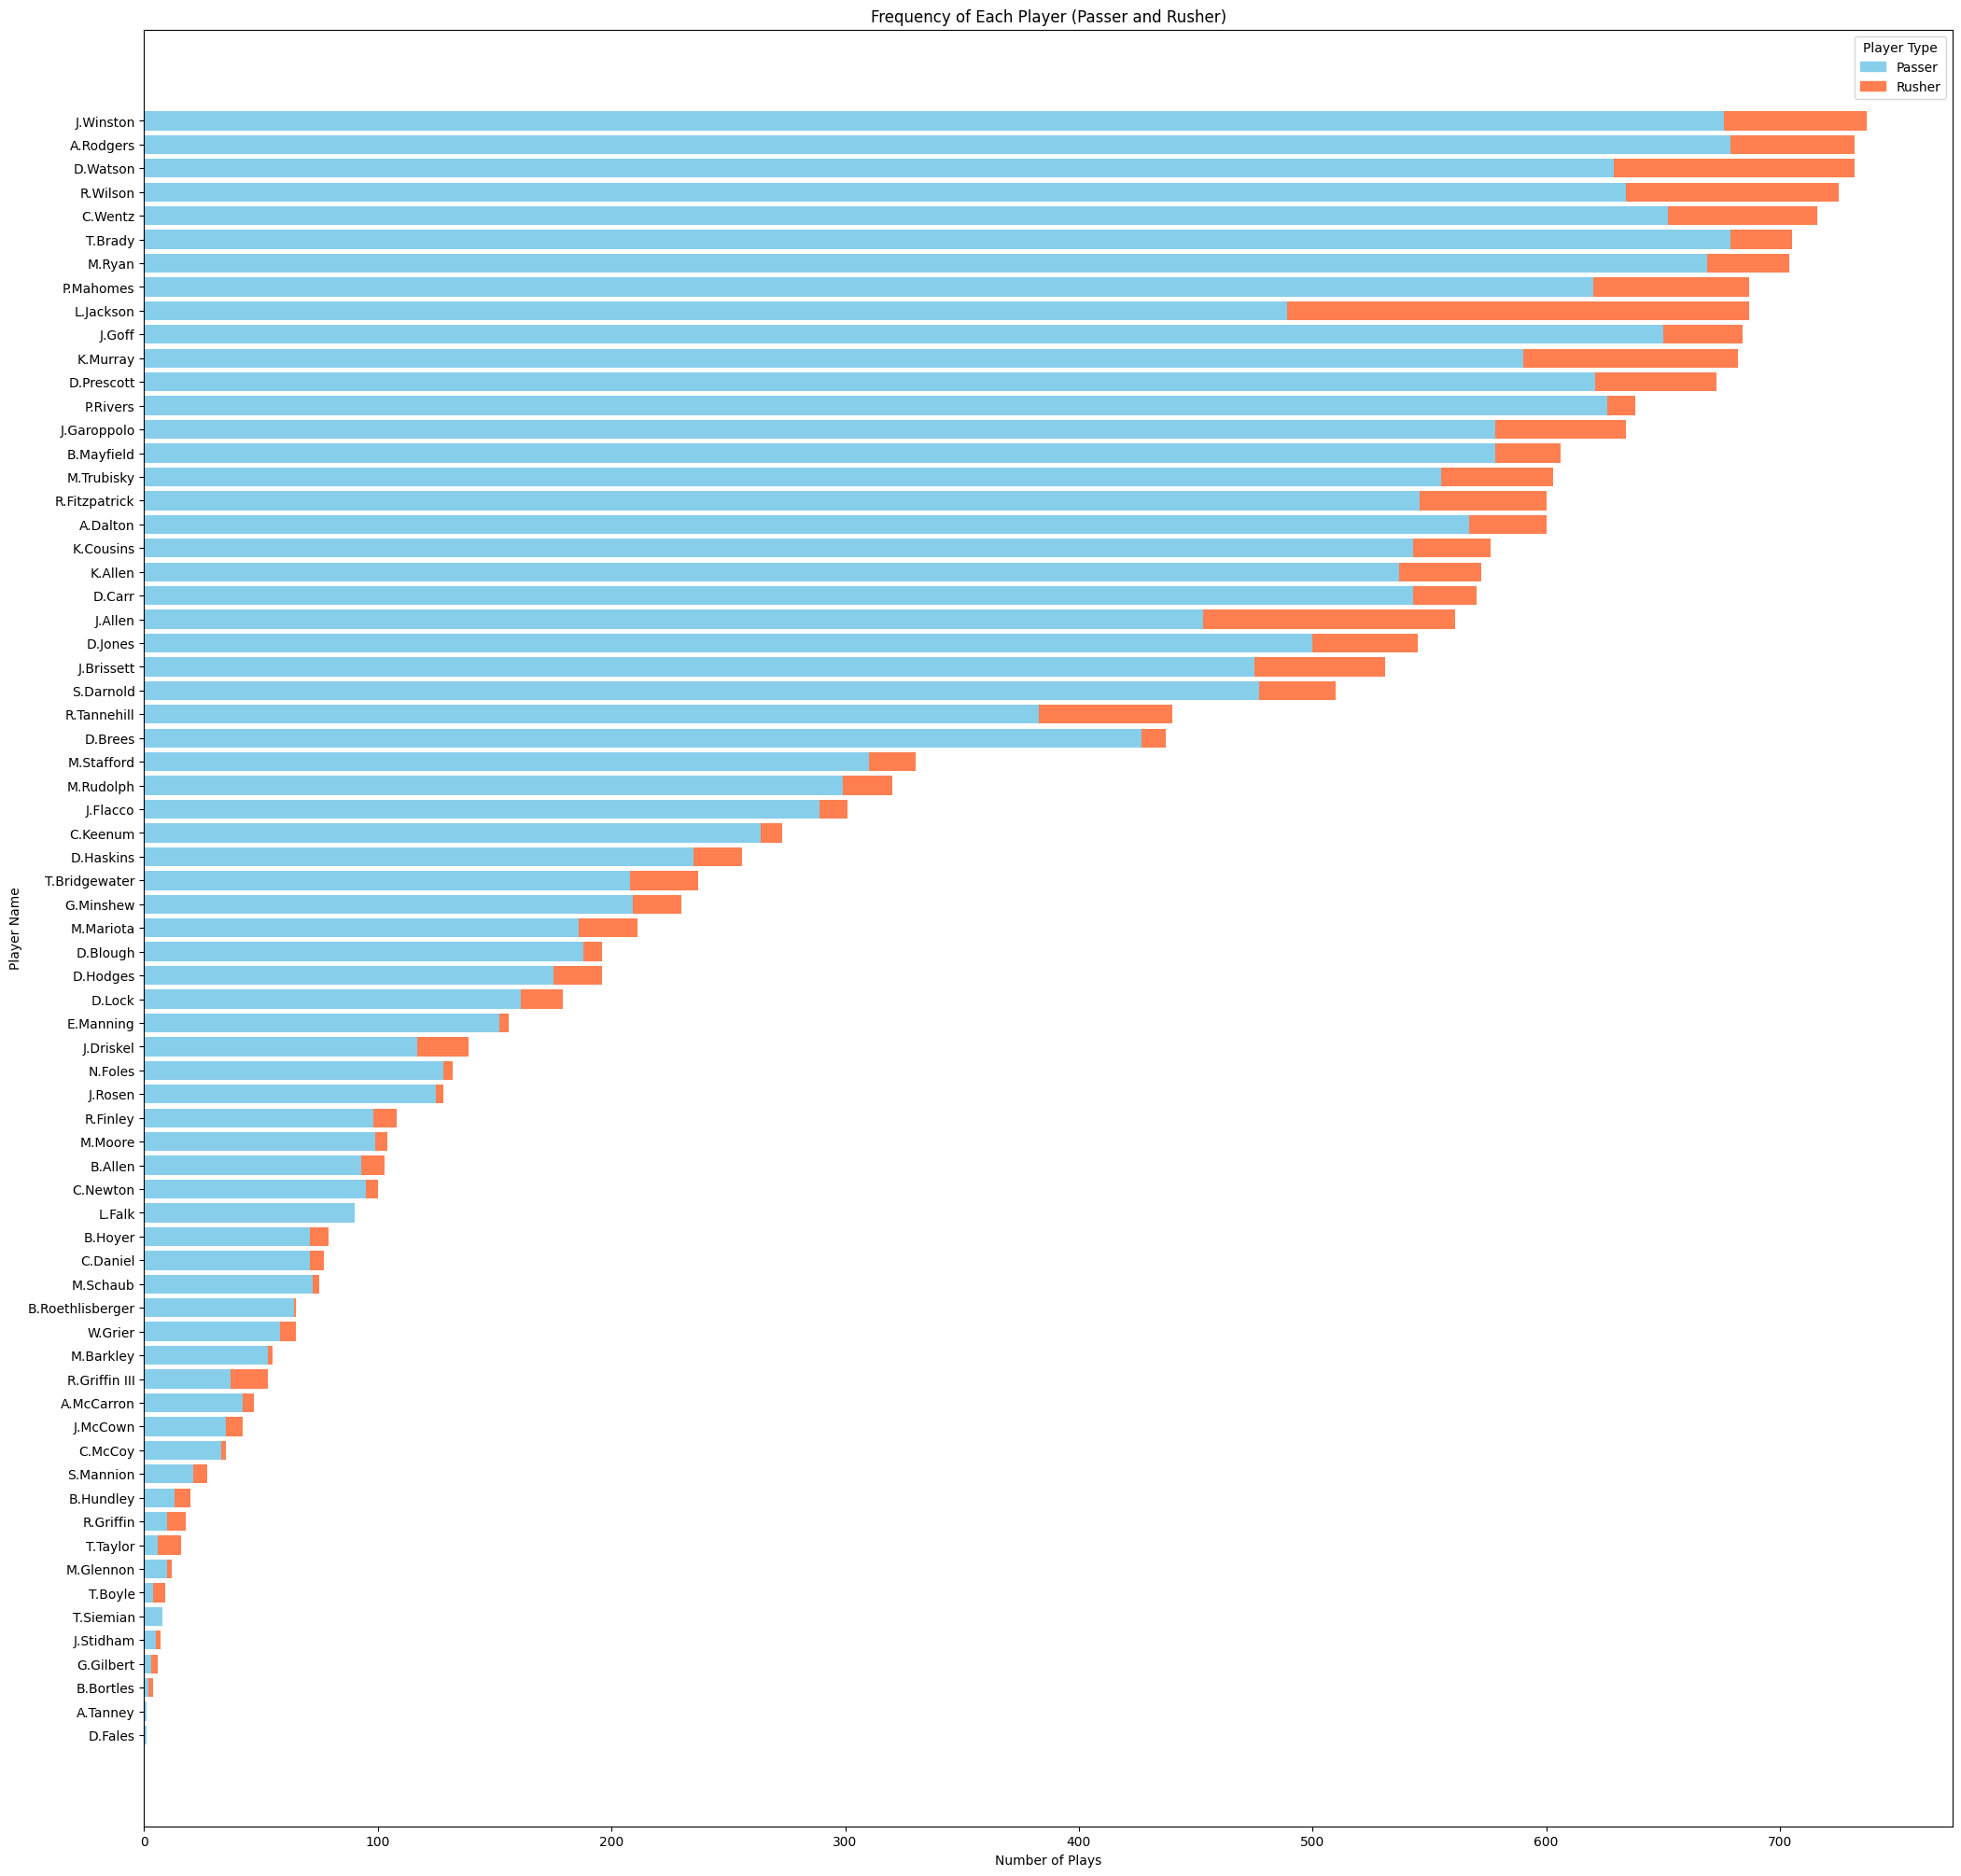

In [392]:
##########################################################################################################################
# Graph the number of times each qb made a play and color coded their bars based on weather they were rushing or passing
# for the play
##########################################################################################################################

# Assuming 'new_filtered_file2' is your DataFrame loaded appropriately with passer and rusher data
# Replace this with your actual DataFrame loading method if different
# new_filtered_file2 = pd.read_csv('your_data_file.csv')

# Count occurrences for passer player names
passer_counts = new_filtered_file2['passer_player_name'].value_counts()
passer_counts = passer_counts.reset_index()
passer_counts.columns = ['Player Name', 'Number of Plays']
passer_counts['Player Type'] = 'Passer'  # Add a column to identify player type

# Count occurrences for rusher player names
rusher_counts = new_filtered_file2['rusher_player_name'].value_counts()
rusher_counts = rusher_counts.reset_index()
rusher_counts.columns = ['Player Name', 'Number of Plays']
rusher_counts['Player Type'] = 'Rusher'  # Add a column to identify player type

# Combine passer and rusher data
all_counts = pd.concat([passer_counts, rusher_counts])

# Group data by player name and sum the number of plays
all_counts_grouped = all_counts.groupby(['Player Name', 'Player Type'])['Number of Plays'].sum().reset_index()

# Pivot the grouped data for easier plotting
pivot_data = all_counts_grouped.pivot(index='Player Name', columns='Player Type', values='Number of Plays').fillna(0)

# Calculate total plays for sorting
pivot_data['Total Plays'] = pivot_data['Passer'] + pivot_data['Rusher']

# Sort by total plays in descending order
pivot_data = pivot_data.sort_values('Total Plays', ascending=True)

# Prepare to plot
plt.figure(figsize=(25, 25))  # Set the figure size for better readability

# Plotting passer plays
plt.barh(pivot_data.index, pivot_data['Passer'], color='skyblue', label='Passer')

# Plotting rusher plays, starting from the end of passer plays
plt.barh(pivot_data.index, pivot_data['Rusher'], left=pivot_data['Passer'], color='coral', label='Rusher')

plt.title('Frequency of Each Player (Passer and Rusher)')
plt.xlabel('Number of Plays')
plt.ylabel('Player Name')

# Add a legend to explain the colors
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['skyblue', 'coral']]
plt.legend(handles, ['Passer', 'Rusher'], title='Player Type')

plt.show()


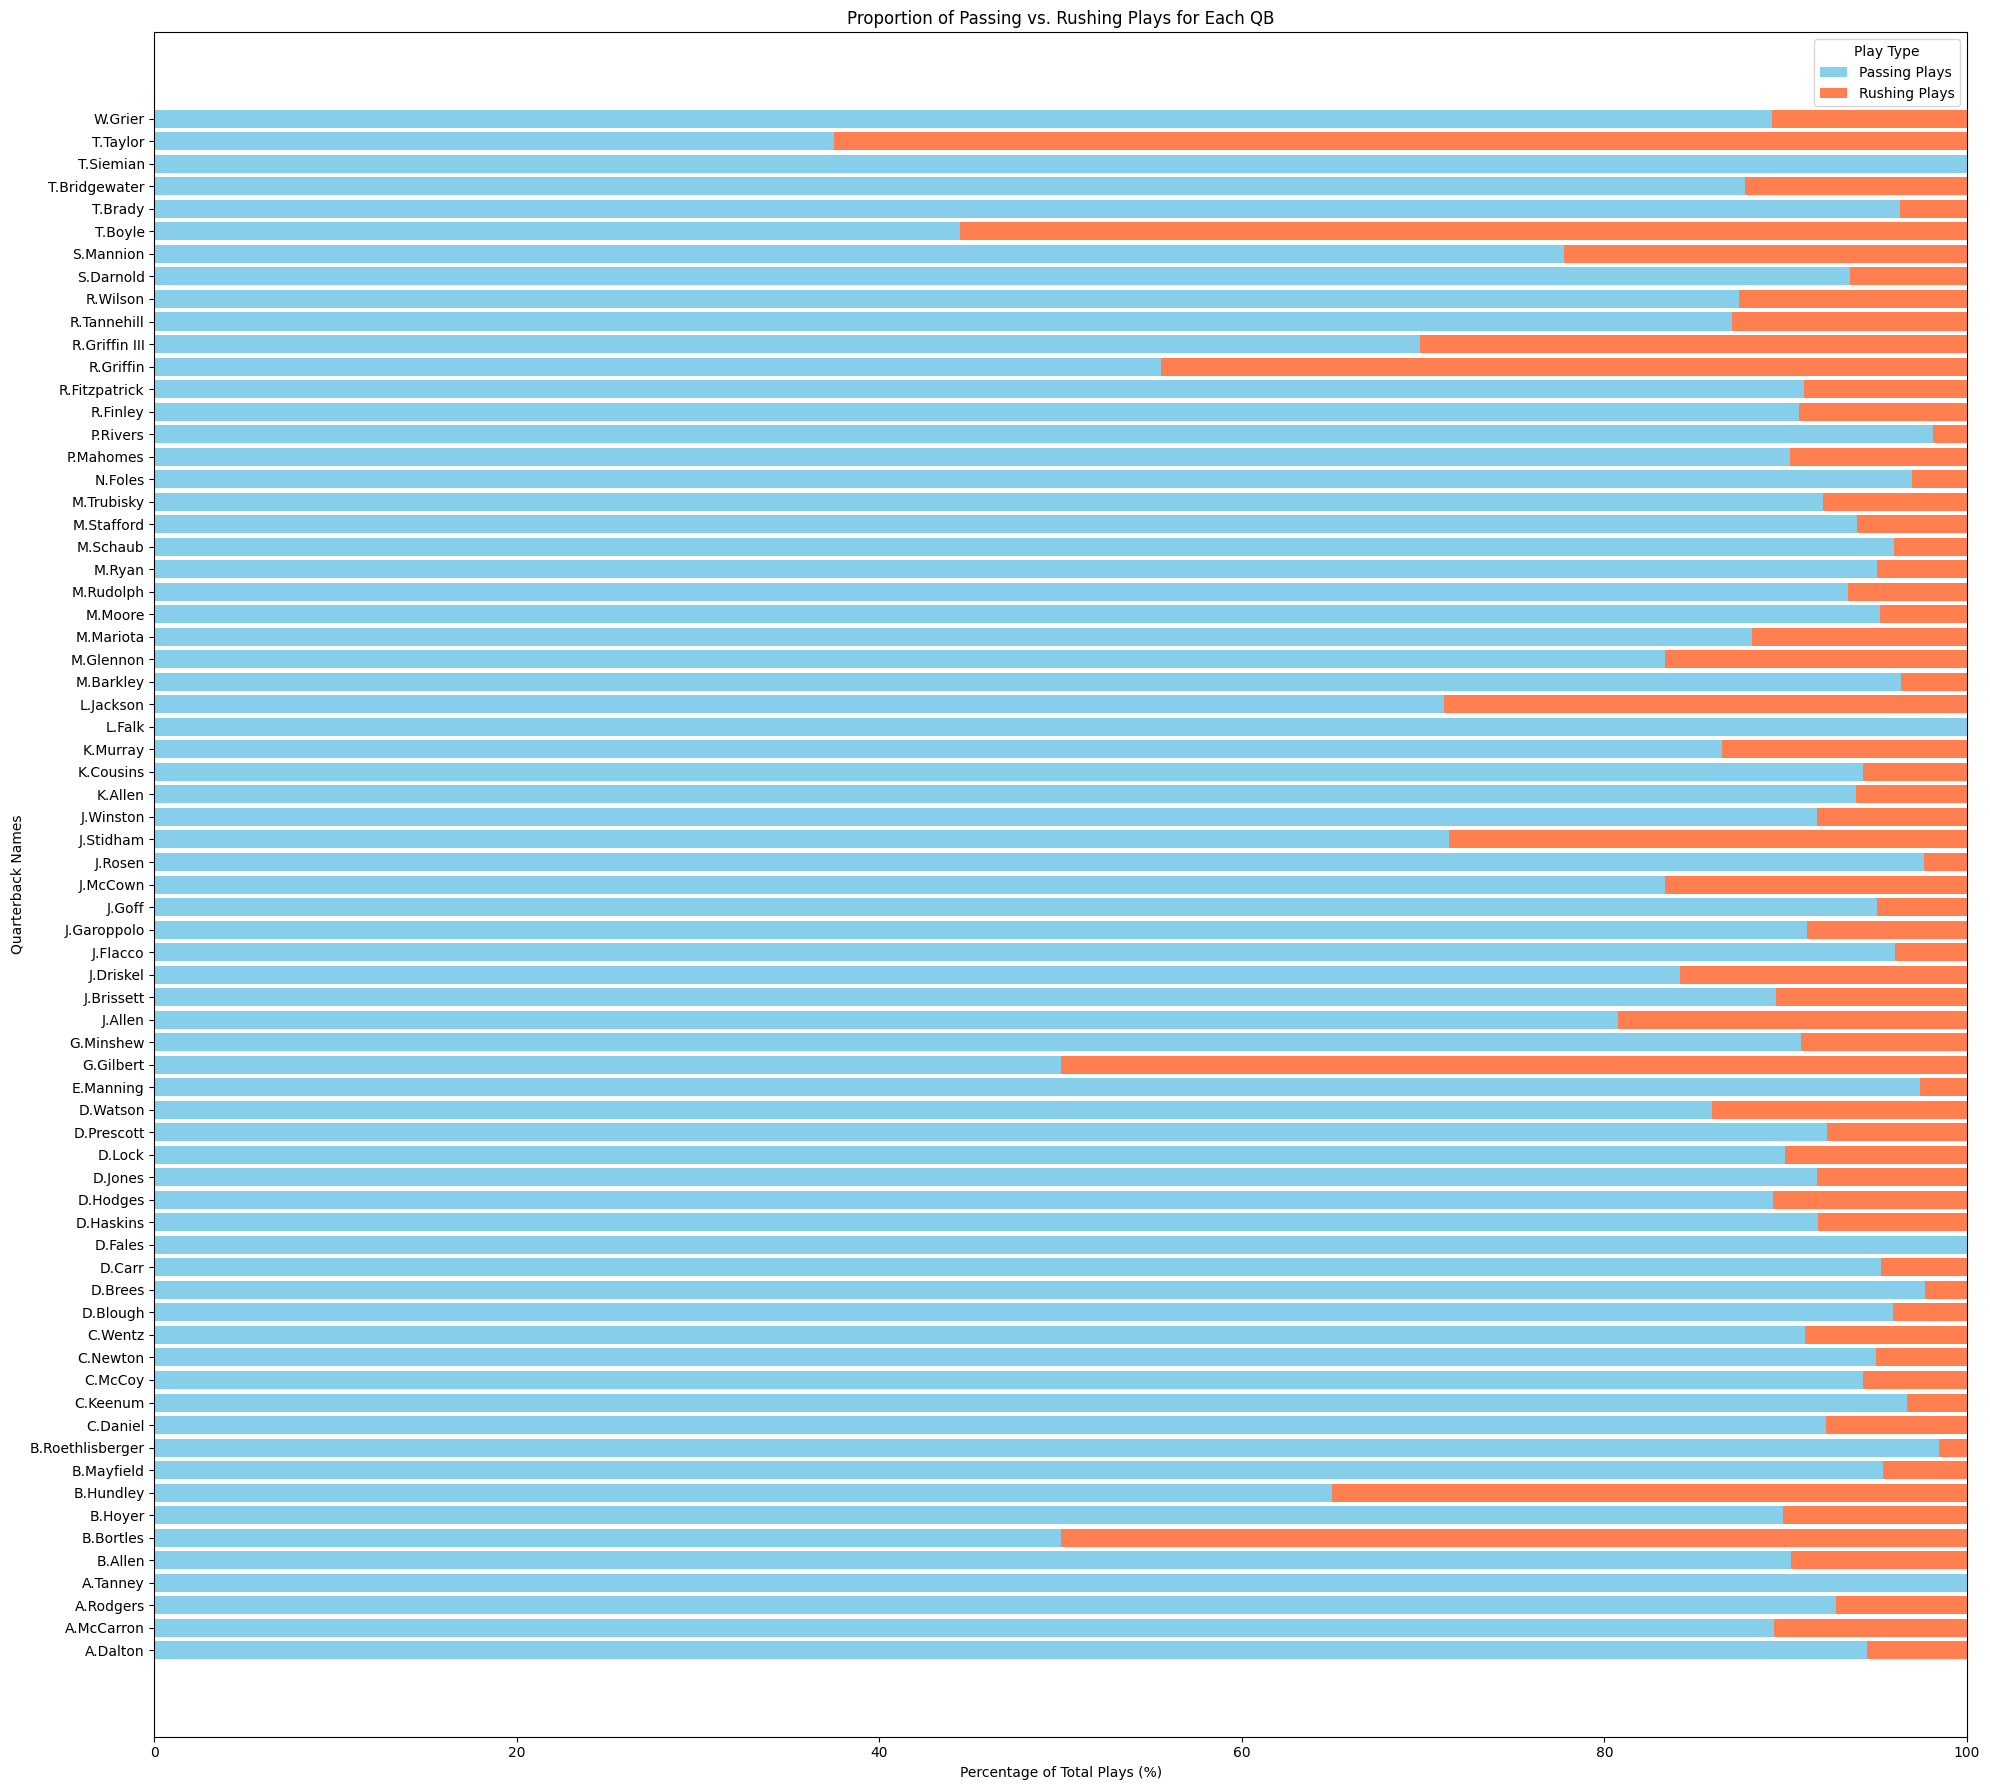

In [393]:
##########################################################################################################################
# Graph the number of times each qb made a play and color coded their bars based on weather they were rushing or passing
# for the play. But this time normalized to be out of 100% for each player respectively
##########################################################################################################################

# Assuming 'qb19' list has already been defined and contains the names of the quarterbacks

# Count occurrences for passer player names
passer_counts = new_filtered_file2['passer_player_name'].value_counts().reset_index()
passer_counts.columns = ['Player Name', 'Number of Plays']
passer_counts['Player Type'] = 'Passer'

# Count occurrences for rusher player names
rusher_counts = new_filtered_file2['rusher_player_name'].value_counts().reset_index()
rusher_counts.columns = ['Player Name', 'Number of Plays']
rusher_counts['Player Type'] = 'Rusher'

# Combine passer and rusher data
all_counts = pd.concat([passer_counts, rusher_counts])

# Group data by player name and sum the number of plays, include Player Type for detailed breakdown
all_counts_grouped = all_counts.groupby(['Player Name', 'Player Type'])['Number of Plays'].sum().reset_index()

# Pivot the grouped data for easier plotting
pivot_data = all_counts_grouped.pivot(index='Player Name', columns='Player Type', values='Number of Plays').fillna(0)

# Calculate total plays for normalization
pivot_data['Total Plays'] = pivot_data['Passer'] + pivot_data['Rusher']

# Calculate proportions
pivot_data['Passer Proportion'] = (pivot_data['Passer'] / pivot_data['Total Plays']) * 100
pivot_data['Rusher Proportion'] = (pivot_data['Rusher'] / pivot_data['Total Plays']) * 100

# Plotting
plt.figure(figsize=(20, 18))  # Adjust size to fit all names properly
plt.barh(pivot_data.index, pivot_data['Passer Proportion'], color='skyblue', label='Passing Plays')
plt.barh(pivot_data.index, pivot_data['Rusher Proportion'], left=pivot_data['Passer Proportion'], color='coral', label='Rushing Plays')

plt.title('Proportion of Passing vs. Rushing Plays for Each QB')
plt.xlabel('Percentage of Total Plays (%)')
plt.ylabel('Quarterback Names')

plt.legend(title='Play Type')
plt.tight_layout()  # Adjust layout to make room for label text
plt.show()

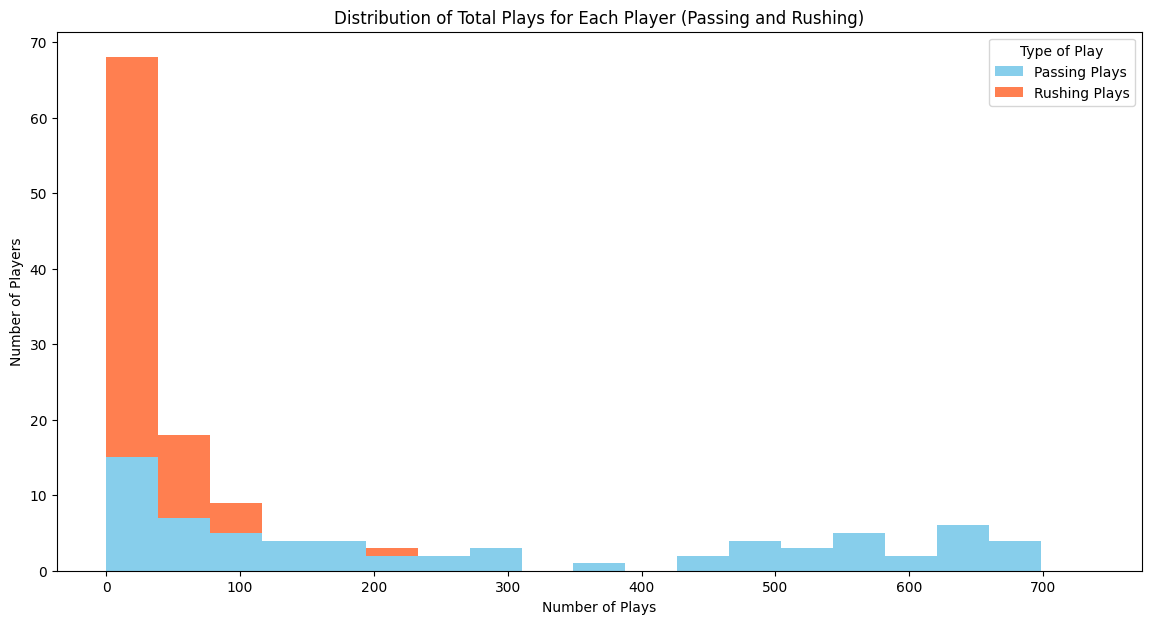

In [394]:
##########################################################################################################################
# Histogram showing the distribution between total plays per player color coded by passing and rushing
##########################################################################################################################

# Load data (replace with your actual DataFrame loading method)
# new_filtered_file2 = pd.read_csv('your_data_file.csv')

# Count occurrences for passer and rusher player names
passer_counts = new_filtered_file2['passer_player_name'].value_counts()
rusher_counts = new_filtered_file2['rusher_player_name'].value_counts()

# Convert Series to DataFrame for easier manipulation
passer_counts_df = passer_counts.reset_index()
passer_counts_df.columns = ['Player Name', 'Passing Plays']

rusher_counts_df = rusher_counts.reset_index()
rusher_counts_df.columns = ['Player Name', 'Rushing Plays']

# Merge the DataFrames on player names
merged_counts = pd.merge(passer_counts_df, rusher_counts_df, on='Player Name', how='outer').fillna(0)

# Add a column for total plays
merged_counts['Total Plays'] = merged_counts['Passing Plays'] + merged_counts['Rushing Plays']

# Sort players by total plays
merged_counts.sort_values('Total Plays', ascending=False, inplace=True)

# Create bins for histogram
max_plays = int(merged_counts['Total Plays'].max())
bins = np.linspace(0, max_plays, 20)  # Adjust number of bins as needed

# Create stacked histogram
plt.figure(figsize=(14, 7))
plt.hist([merged_counts['Passing Plays'], merged_counts['Rushing Plays']], bins=bins, stacked=True,
         label=['Passing Plays', 'Rushing Plays'], color=['skyblue', 'coral'])
plt.title('Distribution of Total Plays for Each Player (Passing and Rushing)')
plt.xlabel('Number of Plays')
plt.ylabel('Number of Players')
plt.legend(title='Type of Play')
plt.show()


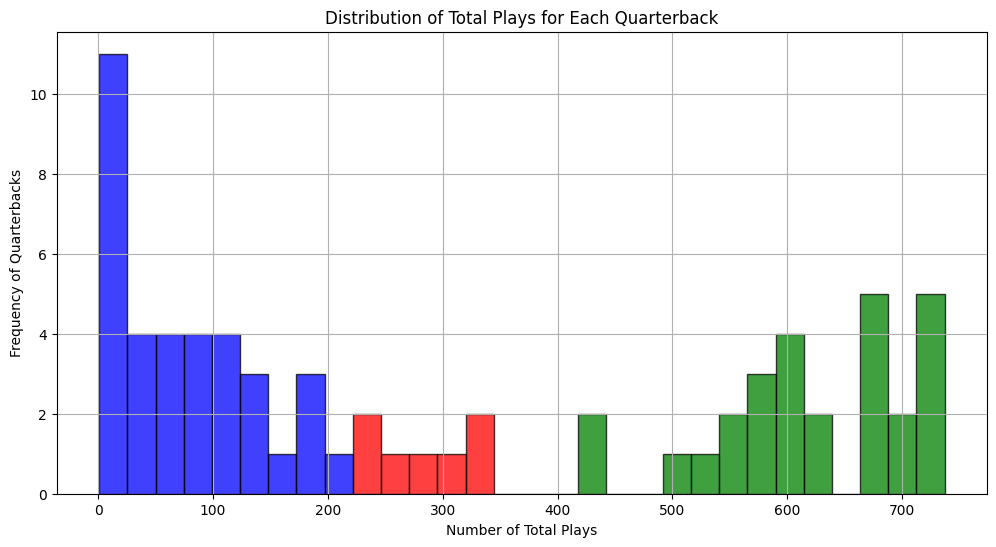

In [395]:
##########################################################################################################################
# Histogram showing the distribution between total plays per player shown differently
##########################################################################################################################

# Assuming you already have the DataFrame 'new_filtered_file2' loaded and it includes both passer and rusher plays
# Count occurrences for each QB
passer_counts = new_filtered_file2['passer_player_name'].value_counts()
rusher_counts = new_filtered_file2['rusher_player_name'].value_counts()

# Combine counts
total_counts = passer_counts.add(rusher_counts, fill_value=0)

# Convert to DataFrame for easier handling
total_counts_df = total_counts.reset_index()
total_counts_df.columns = ['Player Name', 'Total Plays']

# Plotting the histogram
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(total_counts_df['Total Plays'], bins=30, alpha=0.75, color='blue', edgecolor='black')

plt.title('Distribution of Total Plays for Each Quarterback')
plt.xlabel('Number of Total Plays')
plt.ylabel('Frequency of Quarterbacks')

# Customizing to highlight specific characteristics or regions
for i in range(len(patches)):
    if bins[i] >= 200:  # You can adjust this threshold to highlight different parts of the histogram
        patches[i].set_facecolor('red')
    if bins[i] >= 400:
        patches[i].set_facecolor('green')

plt.grid(True)
plt.show()


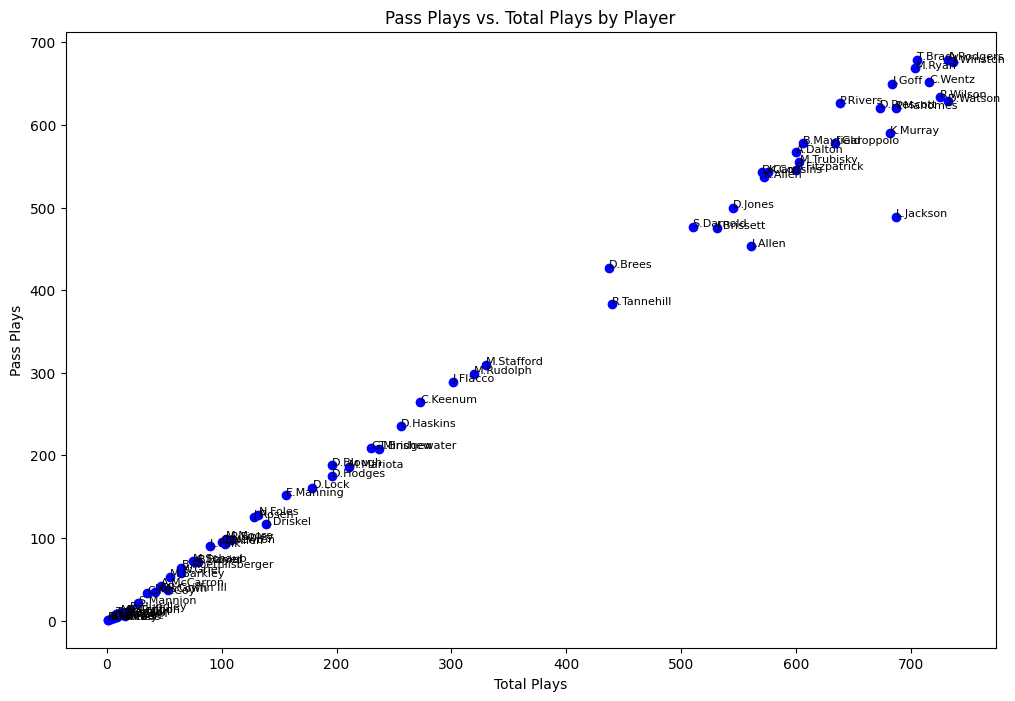

In [396]:
##########################################################################################################################
# scatter plot showing passing plays vs total plays by player
##########################################################################################################################

# Assuming pivot_data is already defined as:
# pivot_data = all_counts_grouped.pivot(index='Player Name', columns='Player Type', values='Number of Plays').fillna(0)
# pivot_data['Total Plays'] = pivot_data['Passer'] + pivot_data['Rusher']

# Reset the index to have 'Player Name' as a column and select needed columns
data = pivot_data.reset_index()[['Player Name', 'Total Plays', 'Passer']]

# Plot the scatter plot: Total Plays on x-axis, Pass Plays on y-axis
plt.figure(figsize=(12, 8))
plt.scatter(data['Total Plays'], data['Passer'], color='blue')
plt.title('Pass Plays vs. Total Plays by Player')
plt.xlabel('Total Plays')
plt.ylabel('Pass Plays')

# Optionally, label each point with the player's name
for i, row in data.iterrows():
    plt.text(row['Total Plays'], row['Passer'], row['Player Name'], fontsize=8)
plt.show()


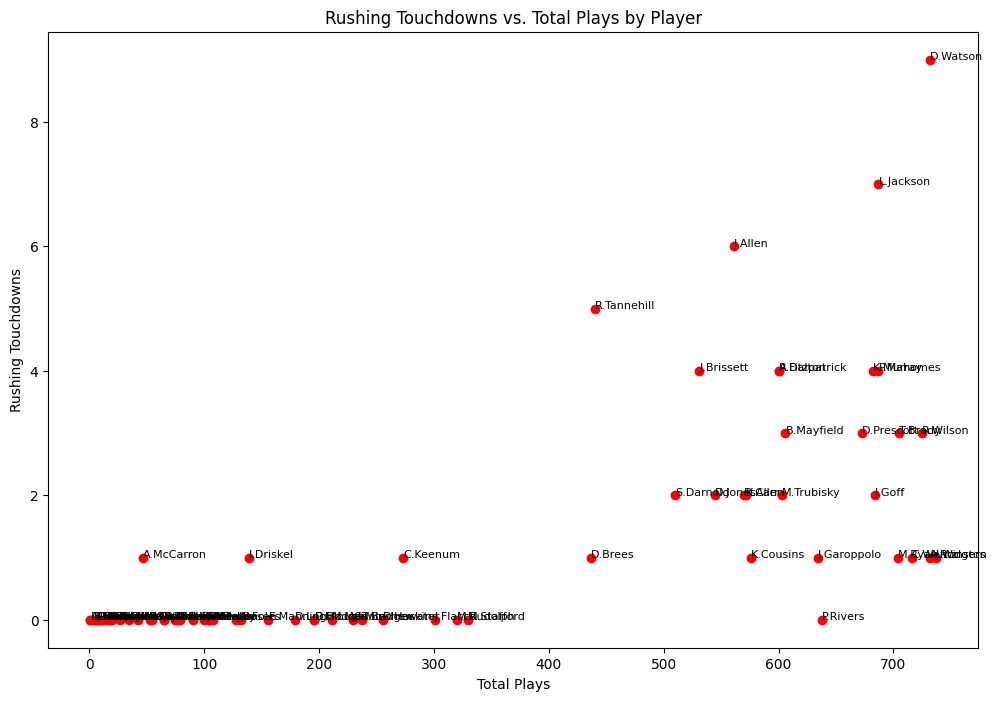

In [397]:
##########################################################################################################################
# scatter plot showing rushing plays vs total plays by player
##########################################################################################################################

# Calculate rushing touchdown counts:
rusher_tds = new_filtered_file2.groupby('rusher_player_name')['rush_touchdown'].sum().reset_index()
rusher_tds.columns = ['Player Name', 'Rushing Touchdowns']

# --- Merge with total plays data ---
# (Assuming you already have pivot_data with 'Passer', 'Rusher', and 'Total Plays')
total_plays_df = pivot_data.reset_index()[['Player Name', 'Total Plays']]
merged_rush_data = pd.merge(total_plays_df, rusher_tds, on='Player Name', how='left').fillna(0)

# --- Plot the scatter plot ---
plt.figure(figsize=(12, 8))
plt.scatter(merged_rush_data['Total Plays'], merged_rush_data['Rushing Touchdowns'], color='red')
plt.title('Rushing Touchdowns vs. Total Plays by Player')
plt.xlabel('Total Plays')
plt.ylabel('Rushing Touchdowns')

# Optionally, label each point with the player name
for i, row in merged_rush_data.iterrows():
    plt.text(row['Total Plays'], row['Rushing Touchdowns'], row['Player Name'], fontsize=8)
plt.show()


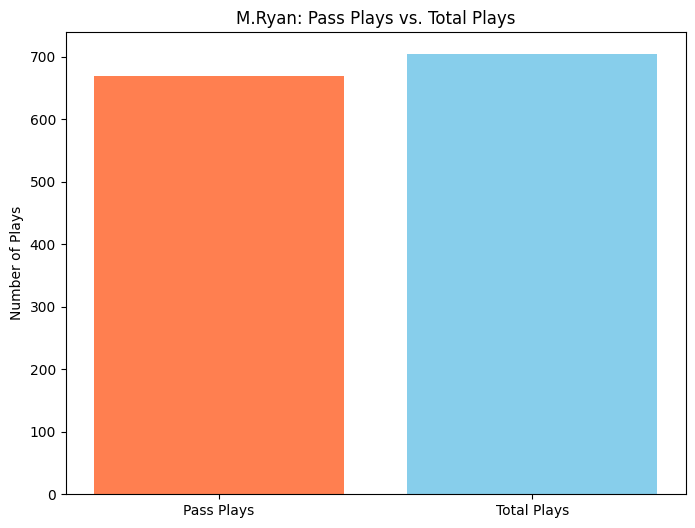

In [398]:
##########################################################################################################################
# bar graph showing the difference between pass plays and total plays for a single player
##########################################################################################################################

# Define the specific player you want to examine
player_name = "M.Ryan"  # Replace with the desired player name

# Filter the plays for the player:
player_data = new_filtered_file2[
    (new_filtered_file2['passer_player_name'] == player_name) |
    (new_filtered_file2['rusher_player_name'] == player_name)
]

# Calculate total plays: simply count the number of rows for this player
total_plays = len(player_data)

# Count the number of pass plays for the player (plays where they appear as the passer)
pass_plays = len(player_data[player_data['passer_player_name'] == player_name])

# Create a bar plot comparing pass plays and total plays
plt.figure(figsize=(8, 6))
plt.bar(['Pass Plays', 'Total Plays'], [pass_plays, total_plays],
        color=['coral', 'skyblue'])
plt.title(f'{player_name}: Pass Plays vs. Total Plays')
plt.ylabel('Number of Plays')
plt.show()


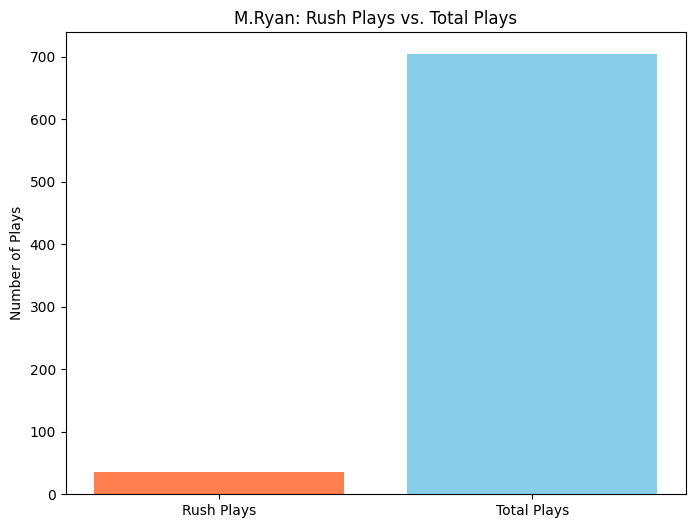

In [399]:
##########################################################################################################################
# bar graph showing the difference between rushing plays and total plays for a single player
##########################################################################################################################

# Define the specific player you want to examine
player_name = "M.Ryan"  # Replace with the desired player name

# Filter the plays for the player:
# (We assume a play can be attributed either as a pass or a rush)
player_data = new_filtered_file2[
    (new_filtered_file2['passer_player_name'] == player_name) |
    (new_filtered_file2['rusher_player_name'] == player_name)
]

# Total plays is simply the number of rows for this player
total_plays = len(player_data)

# Count the number of rush plays for the player
rush_plays = len(player_data[player_data['rusher_player_name'] == player_name])

# Create a bar plot comparing rush plays and total plays
plt.figure(figsize=(8, 6))
plt.bar(['Rush Plays', 'Total Plays'], [rush_plays, total_plays],
        color=['coral', 'skyblue'])
plt.title(f'{player_name}: Rush Plays vs. Total Plays')
plt.ylabel('Number of Plays')
plt.show()


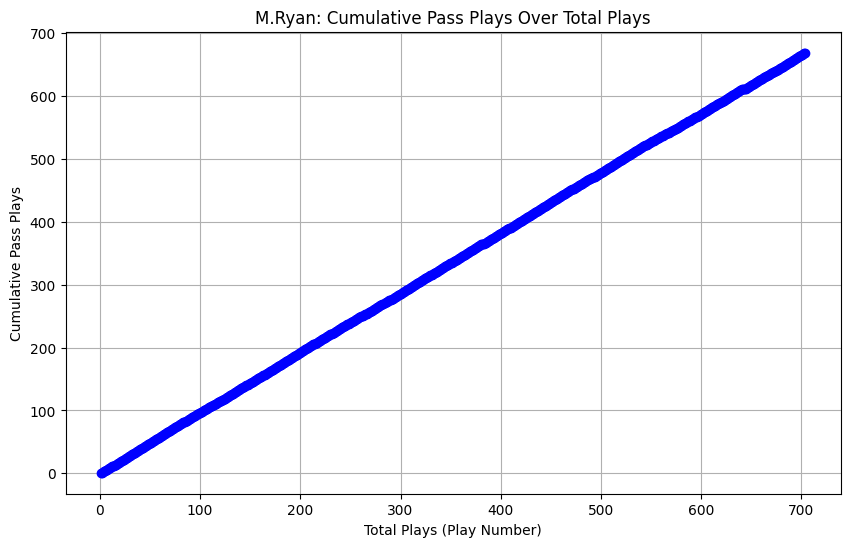

In [400]:
##########################################################################################################################
# line graph showing the the rate of change between the number of passing plays made by a player to their total number
# of plays made
##########################################################################################################################

# Define the specific player you want to examine
player_name = "M.Ryan"  # Replace with the desired player name

# Filter the plays for the player:
player_data = new_filtered_file2[
    (new_filtered_file2['passer_player_name'] == player_name) |
    (new_filtered_file2['rusher_player_name'] == player_name)
].copy()

# Create a column to indicate if the play was a pass for this player (1 if yes, 0 if not)
player_data['is_pass'] = (player_data['passer_player_name'] == player_name).astype(int)

# Reset index (assuming the DataFrame is in play order) and assign play numbers
player_data = player_data.reset_index(drop=True)
player_data['Play Number'] = player_data.index + 1

# Compute the cumulative sum of pass plays
player_data['Cumulative Passes'] = player_data['is_pass'].cumsum()

# Plot a line graph (slope graph) showing cumulative pass plays over total plays
plt.figure(figsize=(10, 6))
plt.plot(player_data['Play Number'], player_data['Cumulative Passes'], marker='o', linestyle='-', color='blue')
plt.title(f'{player_name}: Cumulative Pass Plays Over Total Plays')
plt.xlabel('Total Plays (Play Number)')
plt.ylabel('Cumulative Pass Plays')
plt.grid(True)
plt.show()


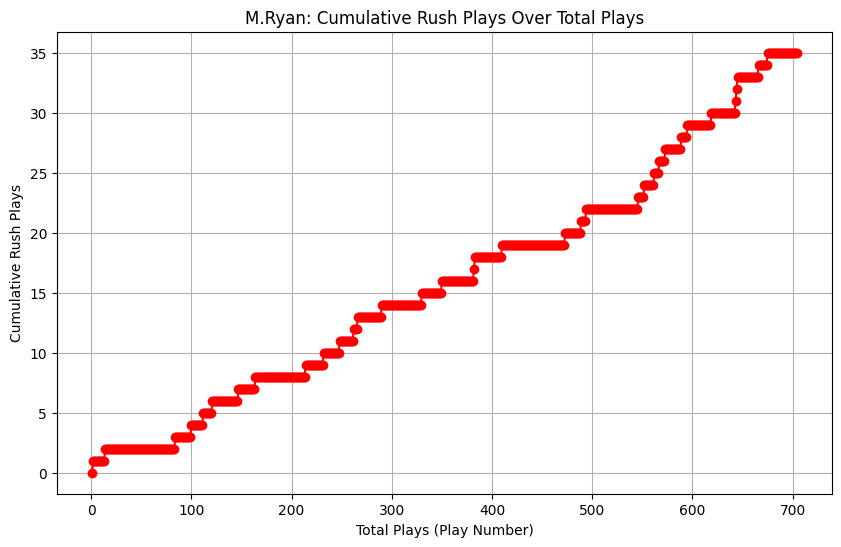

In [401]:
##########################################################################################################################
# line graph showing the the rate of change between the number of rushing plays made by a player to their total number
# of plays made
##########################################################################################################################

# Define the specific player you want to examine
player_name = "M.Ryan"  # Replace with the desired player name

# Filter the plays for the player:
player_data = new_filtered_file2[
    (new_filtered_file2['passer_player_name'] == player_name) |
    (new_filtered_file2['rusher_player_name'] == player_name)
].copy()

# Create a column to indicate if the play was a rush for this player (1 if yes, 0 if not)
player_data['is_rush'] = (player_data['rusher_player_name'] == player_name).astype(int)

# Reset the index (assuming the DataFrame is in play order) and assign play numbers
player_data = player_data.reset_index(drop=True)
player_data['Play Number'] = player_data.index + 1

# Compute the cumulative sum of rush plays
player_data['Cumulative Rushes'] = player_data['is_rush'].cumsum()

# Plot a line graph showing cumulative rush plays over total plays
plt.figure(figsize=(10, 6))
plt.plot(player_data['Play Number'], player_data['Cumulative Rushes'], marker='o', linestyle='-', color='red')
plt.title(f'{player_name}: Cumulative Rush Plays Over Total Plays')
plt.xlabel('Total Plays (Play Number)')
plt.ylabel('Cumulative Rush Plays')
plt.grid(True)
plt.show()


      Player Name  Number of Plays Player Type
54  R.Griffin III               37      Passer
34  R.Griffin III               16      Rusher


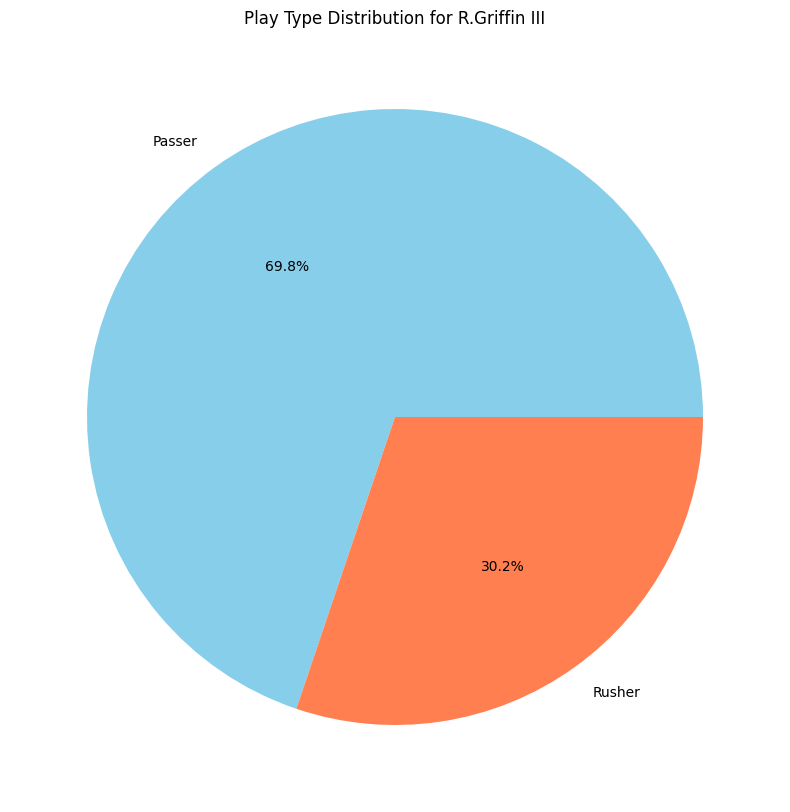

In [402]:
##########################################################################################################################
# Pie chart showing the ratio between passing and rushing for a single palyer for the 2019 season
##########################################################################################################################

# Assuming 'new_filtered_file' is your DataFrame and you have it loaded
player_name = 'R.Griffin III'  # Change this to the player's name you're interested in

# Filter counts for the specific player
player_data = all_counts[all_counts['Player Name'] == player_name]
print(player_data)
# Check if data exists for the player
if not player_data.empty:
    # Plotting the pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(player_data['Number of Plays'], labels=player_data['Player Type'], colors=['skyblue', 'coral'], autopct='%1.1f%%')
    plt.title(f'Play Type Distribution for {player_name}')
    plt.show()
else:
    print(f"No data available for {player_name}. Please check the player name and try again.")


In [ ]:
##########################################################################################################################
# Pie chart showing the ratio between avg of all passing plays to the avg of all rushing rushing for every palyer in the 2019 season
##########################################################################################################################

# Assuming 'all_counts' is your DataFrame loaded with passer and rusher data as previously setup

# Sum the number of plays by type
#total_passer_plays = all_counts[all_counts['Player Type'] == 'Passer']['Number of Plays'].sum()
#total_rusher_plays = all_counts[all_counts['Player Type'] == 'Rusher']['Number of Plays'].sum()

# Count the number of unique players for each type
#all_player_names = pd.concat([new_filtered_file['passer_player_name'], new_filtered_file['rusher_player_name']])

# Drop duplicates to get only unique player names
#unique_player_names = all_player_names.drop_duplicates()

# Count the unique player names
#num_unique_players = len(unique_player_names)

# Calculate the average number of players for passers and rushers
#avg_passer_plays = total_passer_plays / num_unique_players
#avg_rusher_plays = total_rusher_plays / num_unique_players

# Prepare data for pie chart
#play_counts = [avg_passer_plays, avg_rusher_plays]
#labels = ['Average Passing Plays', 'Average Rushing Plays']
#colors = ['skyblue', 'coral']

# Plotting the pie chart
#plt.figure(figsize=(10, 10))
#patches, texts, autotexts = plt.pie(play_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Annotating total plays within the pie chart
#plt.annotate('Total Plays:\n' + str(total_plays), xy=(0, 0), fontsize=12, ha='center', va='center')

#plt.title('Average Number of Plays: Passing vs. Rushing')
#plt.show()

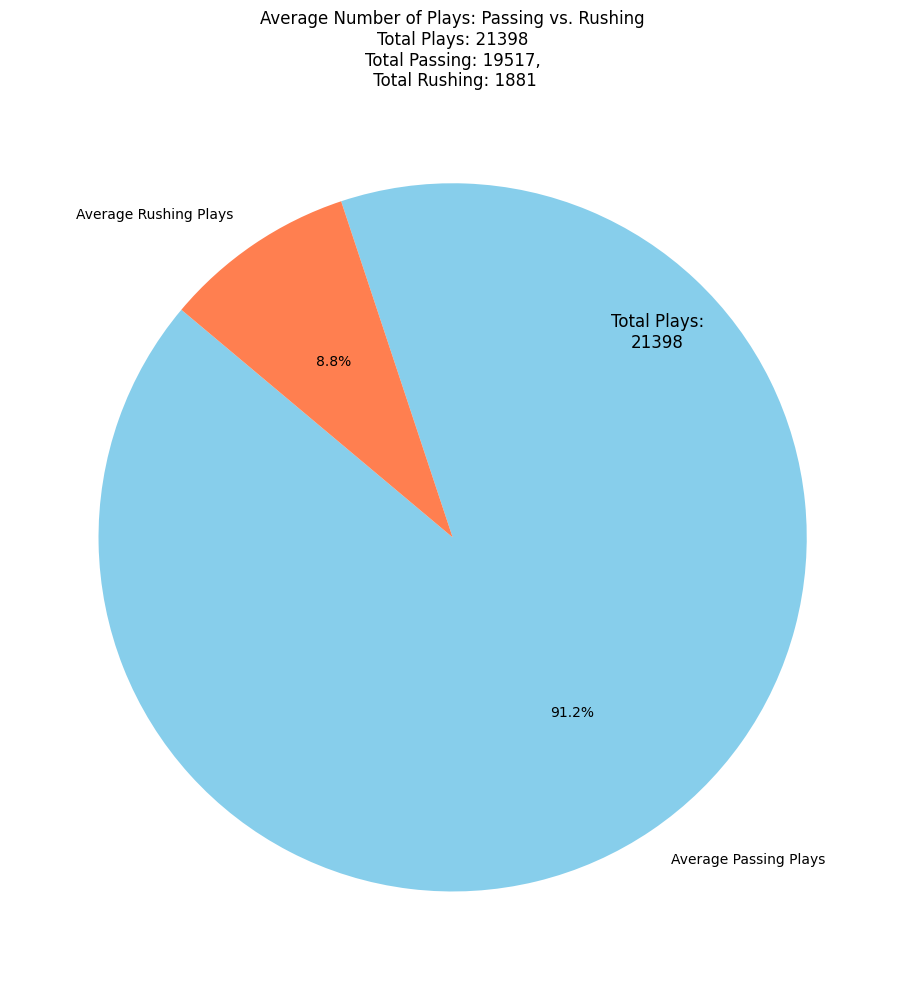

In [403]:
##########################################################################################################################
# Pie chart showing the ratio between avg of all passing plays to the avg of all rushing rushing to all plays in the 2019 season
##########################################################################################################################

# Assuming 'all_counts' is your DataFrame loaded with passer and rusher data as previously setup

# Sum the number of plays by type
total_passer_plays = all_counts[all_counts['Player Type'] == 'Passer']['Number of Plays'].sum()
total_rusher_plays = all_counts[all_counts['Player Type'] == 'Rusher']['Number of Plays'].sum()

# Count the number of rows (plays) in the file
num_plays = new_filtered_file2.shape[0]

# Calculate the average number of plays for passers and rushers
avg_passer_plays = total_passer_plays / num_plays
avg_rusher_plays = total_rusher_plays / num_plays

# Prepare data for pie chart
play_counts = [avg_passer_plays, avg_rusher_plays]
labels = ['Average Passing Plays', 'Average Rushing Plays']
colors = ['skyblue', 'coral']

# Plotting the pie chart
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(play_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Enhanced title with total plays and totals for each type of play
title_text = f'Average Number of Plays: Passing vs. Rushing\n' \
             f'Total Plays: {num_plays}\n' \
             f'Total Passing: {total_passer_plays},\n Total Rushing: {total_rusher_plays}'
plt.title(title_text)

# Adding annotations within the chart
plt.annotate('Total Plays:\n' + str(num_plays),
             xy=(0.5, 0.5), xycoords='data',
             xytext=(20, 20), textcoords='offset points',
             ha='center', va='center',
             fontsize=12, color='black')

# Improve layout to avoid overlap
plt.tight_layout()

plt.show()

In [431]:
##########################################################################################################################
# debug for totals
##########################################################################################################################

test = pd.read_csv('test.csv')

pass_sum = test['passer_player_name'].notnull().sum()
rush_sum = test['rusher_player_name'].notnull().sum()

print(pass_sum)
print(rush_sum)
print(pass_sum + rush_sum)

19517
1881
21398


In [432]:
##########################################################################################################################
# more debug for totals
##########################################################################################################################

test = pd.read_csv('test.csv')

# Sum of non-null entries for each column
pass_sum = test['passer_player_name'].notnull().sum()
rush_sum = test['rusher_player_name'].notnull().sum()

# Checking for rows where both columns are non-null
both_pass_and_rush = test[test['passer_player_name'].notnull() & test['rusher_player_name'].notnull()].shape[0]

test[test['passer_player_name'].notnull() & test['rusher_player_name'].notnull()].to_csv('overlap.csv', index=False)

print("Pass sum:", pass_sum)
print("Rush sum:", rush_sum)
print("Both non-null (overlap):", both_pass_and_rush)
print("Total unique plays:", pass_sum + rush_sum - both_pass_and_rush)


Pass sum: 19517
Rush sum: 1881
Both non-null (overlap): 0
Total unique plays: 21398


In [433]:
##########################################################################################################################
# total debug
##########################################################################################################################
num_plays = new_filtered_file2.shape[0]
print("Total number of plays:", num_plays)


Total number of plays: 21398


In [434]:
##########################################################################################################################
# total number of players for debug
##########################################################################################################################

all_player_names = pd.concat([new_filtered_file2['passer_player_name'], new_filtered_file2['rusher_player_name']])

# Drop duplicates to get only unique player names
unique_player_names = all_player_names.drop_duplicates()

# Count the unique player names
num_unique_players = len(unique_player_names)
print("Number of unique players:", num_unique_players)

Number of unique players: 70


In [435]:
##########################################################################################################################
# more totals to debug
##########################################################################################################################
print(total_passer_plays)
print(total_rusher_plays)

19517
1881


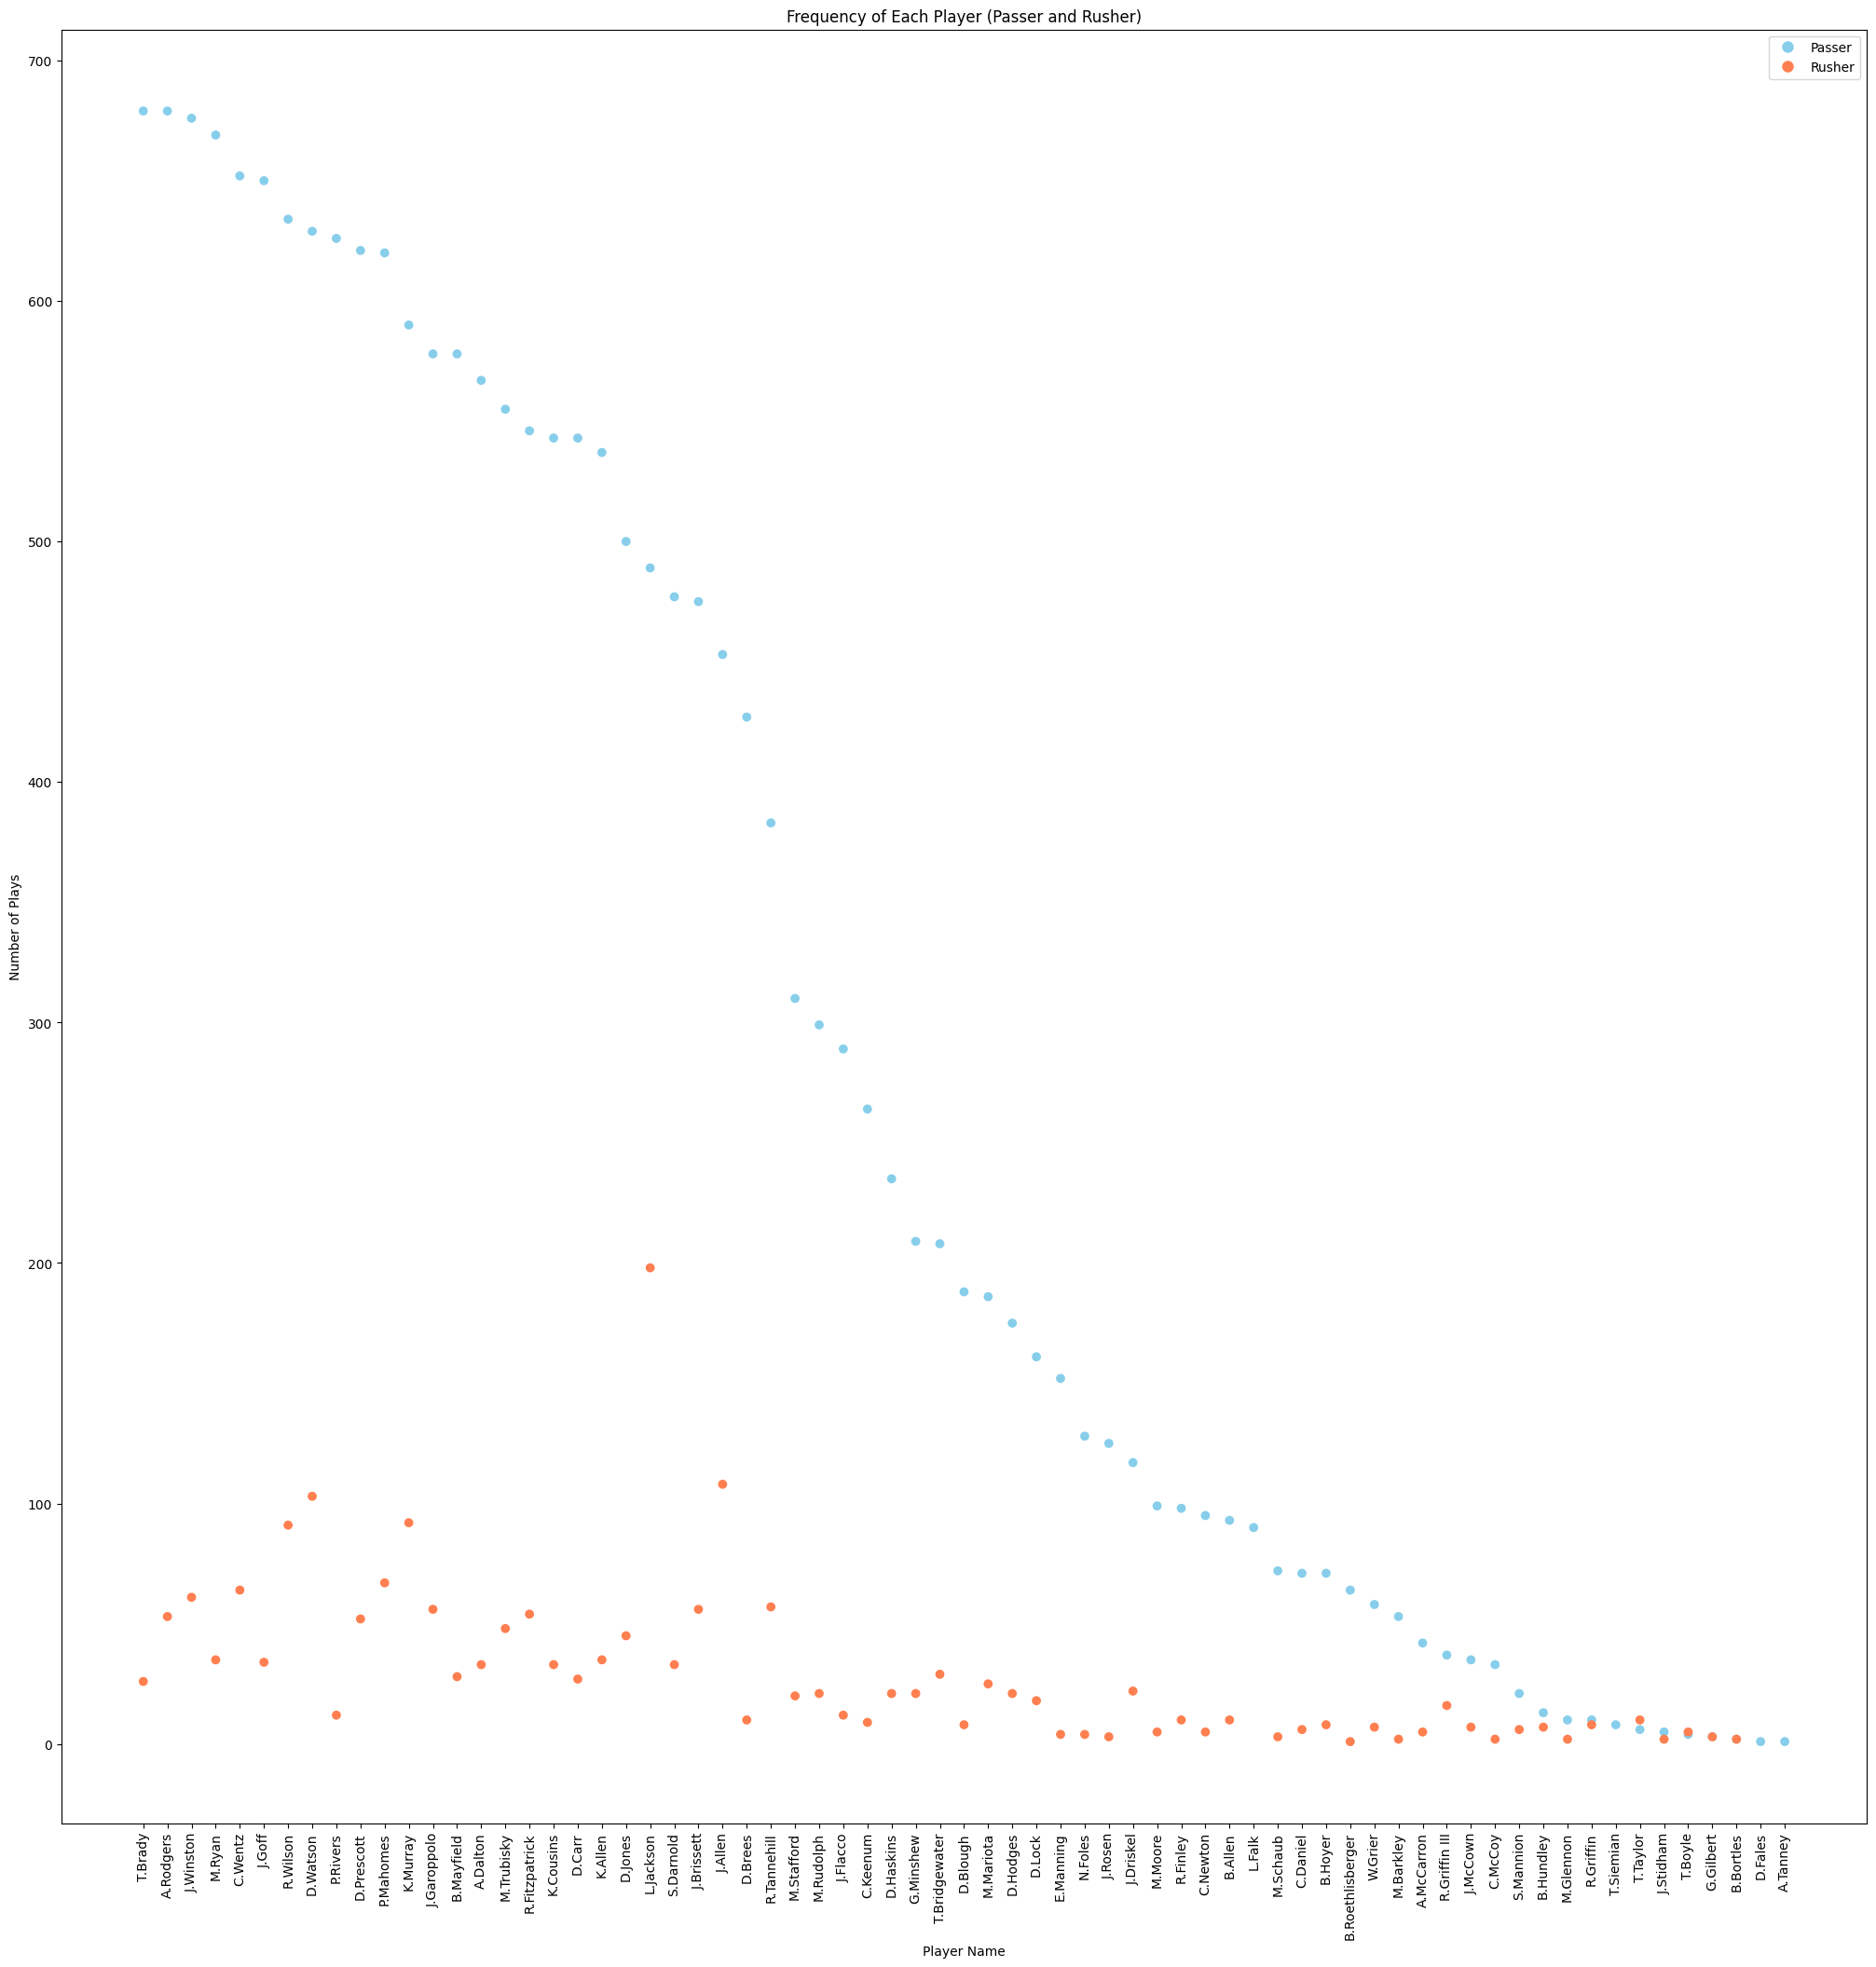

In [409]:
##########################################################################################################################
# Plot the number of times each qb made a play and color coded their dots based on weather they were rushing or passing
# for the play
##########################################################################################################################



from matplotlib.lines import Line2D # Import Line2D for creating legend handles

# Count occurrences for passer player names
passer_counts = new_filtered_file2['passer_player_name'].value_counts()
passer_counts = passer_counts.reset_index()
passer_counts.columns = ['Player Name', 'Number of Plays']
passer_counts['Player Type'] = 'Passer'  # Add a column to identify player type

# Count occurrences for rusher player names
rusher_counts = new_filtered_file2['rusher_player_name'].value_counts()
rusher_counts = rusher_counts.reset_index()
rusher_counts.columns = ['Player Name', 'Number of Plays']
rusher_counts['Player Type'] = 'Rusher'  # Add a column to identify player type

# Combine passer and rusher data
all_counts = pd.concat([passer_counts, rusher_counts])

# Plotting
plt.figure(figsize = (25, 25))

# Use different colors for passers and rushers
# Create a scatter plot with color mapping
scatter = plt.scatter(all_counts['Player Name'], all_counts['Number of Plays'],
                      c=all_counts['Player Type'].map({'Passer': 'skyblue', 'Rusher': 'coral'}))

plt.title('Frequency of Each Player (Passer and Rusher)')
plt.xlabel('Player Name')
plt.ylabel('Number of Plays')
plt.xticks(rotation = 90)

# Add a legend to differentiate between passers and rushers
# Create legend handles manually
handles = [Line2D([0], [0], marker='o', color='w', label=l,
                          markerfacecolor=c, markersize=10)
           for c, l in [('skyblue', 'Passer'), ('coral', 'Rusher')]]  # Use Line2D here

plt.legend(handles=handles)

plt.show()

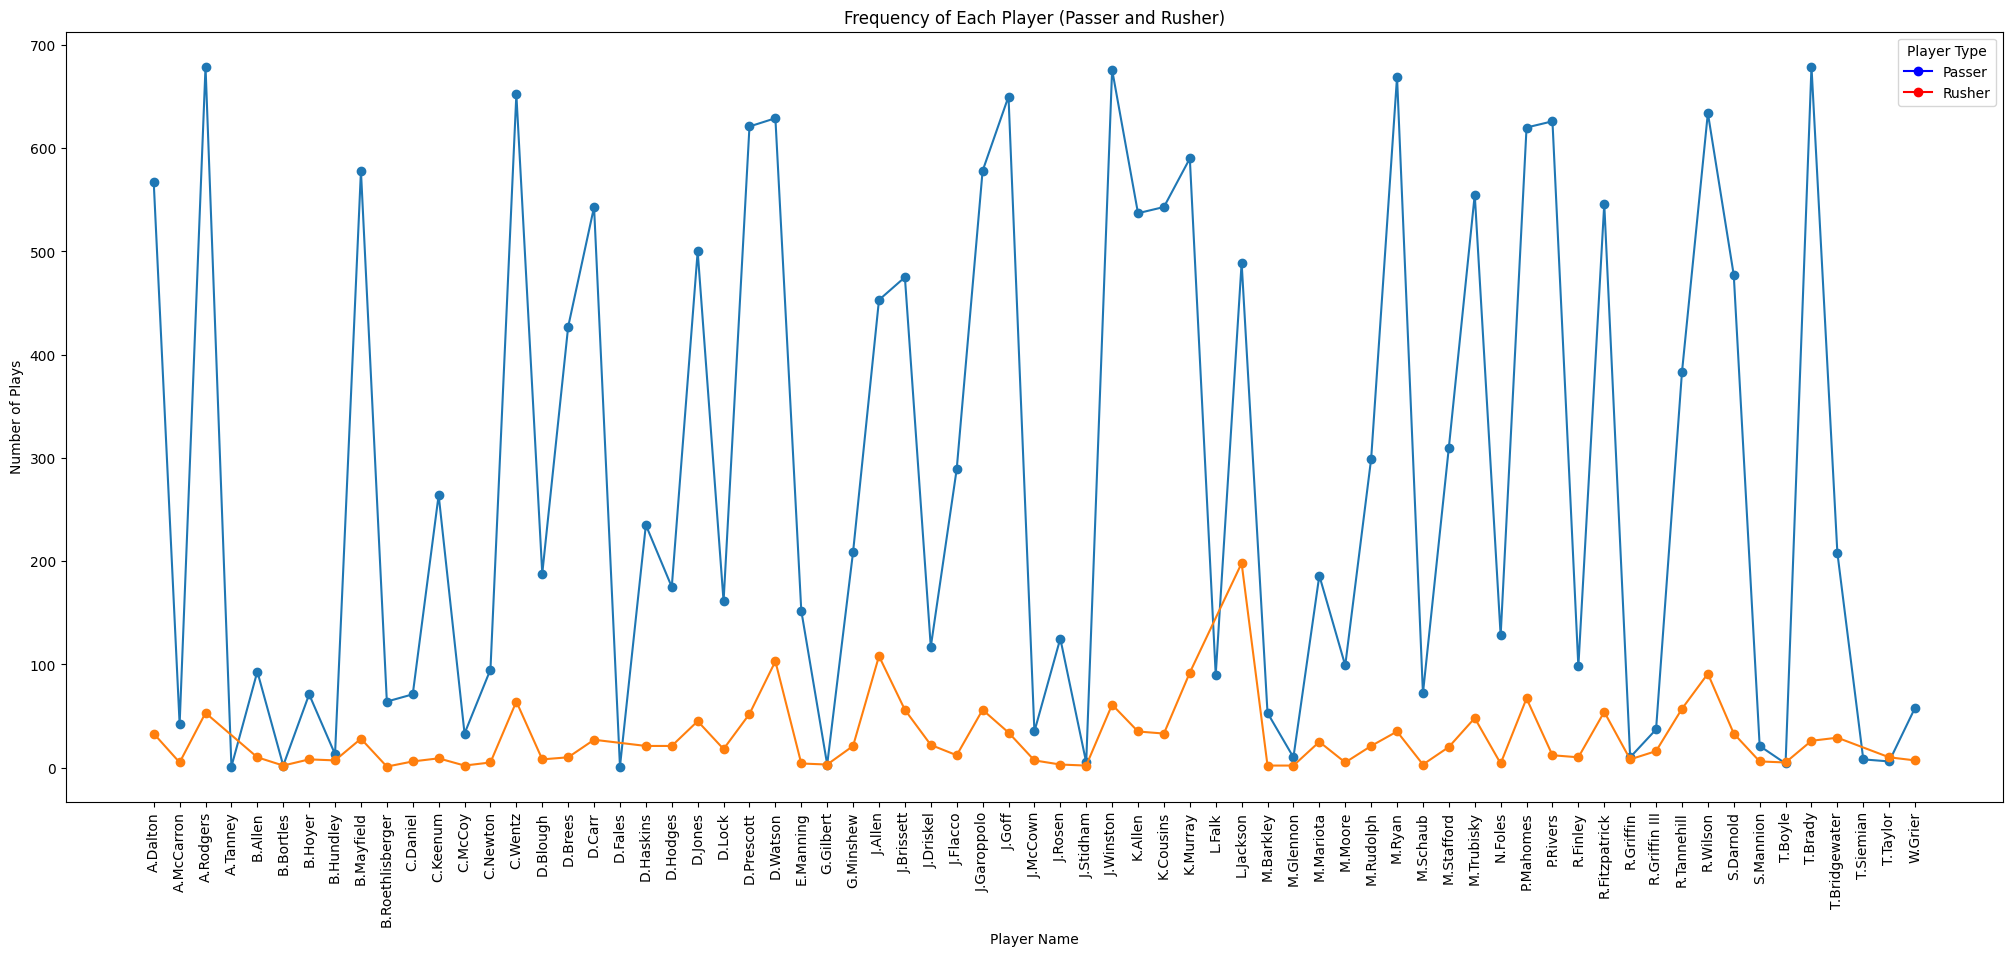

In [410]:
##########################################################################################################################
# plot the number of times each qb made a play and color coded their dots based on weather they were rushing or passing
# for the play. Dots are connected with lines
##########################################################################################################################


# Count occurrences for passer player names
passer_counts = new_filtered_file2['passer_player_name'].value_counts().reset_index()
passer_counts.columns = ['Player Name', 'Number of Plays']
passer_counts['Player Type'] = 'Passer'

# Count occurrences for rusher player names
rusher_counts = new_filtered_file2['rusher_player_name'].value_counts().reset_index()
rusher_counts.columns = ['Player Name', 'Number of Plays']
rusher_counts['Player Type'] = 'Rusher'

# Combine passer and rusher data
all_counts = pd.concat([passer_counts, rusher_counts])

# Sort by Player Name for line continuity
all_counts.sort_values('Player Name', inplace=True)

# Plotting
plt.figure(figsize=(25, 10))

# Plot each type with a different color and line style
for player_type, group_data in all_counts.groupby('Player Type'):
    plt.plot(group_data['Player Name'], group_data['Number of Plays'],
             label=f'{player_type}', marker='o', linestyle='-')  # Use markers to highlight points

plt.title('Frequency of Each Player (Passer and Rusher)')
plt.xlabel('Player Name')
plt.ylabel('Number of Plays')
plt.xticks(rotation = 90)

# Create legend handles manually to match the line styles
handles = [Line2D([0], [0], color='blue', marker='o', linestyle='-', label='Passer'),
           Line2D([0], [0], color='red', marker='o', linestyle='-', label='Rusher')]

plt.legend(handles=handles, title="Player Type")

plt.show()


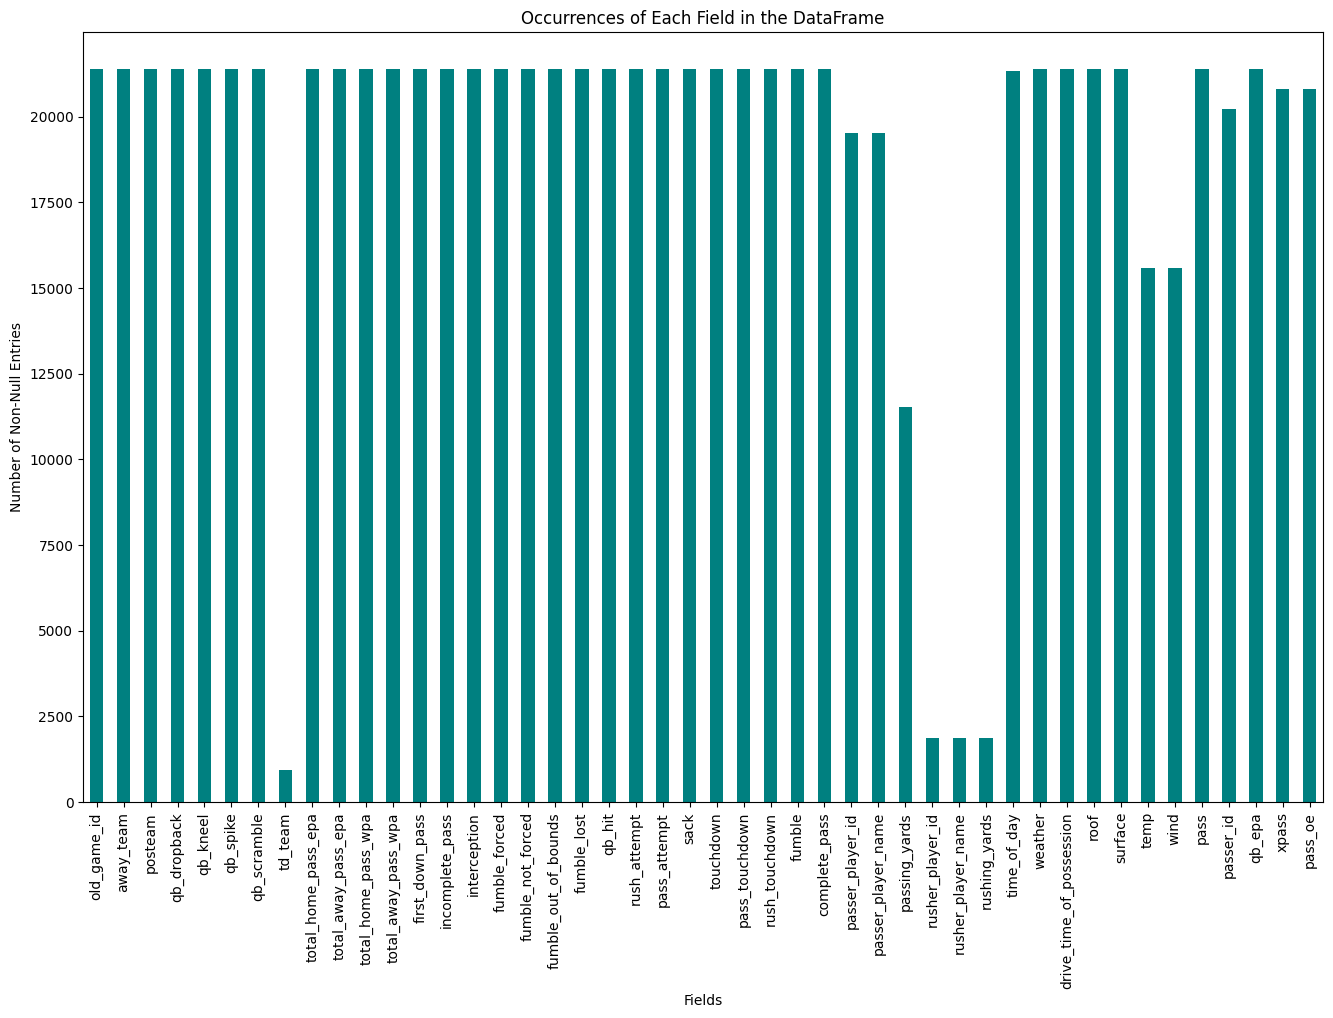

In [411]:
##########################################################################################################################
# graphed the number of items in each column
#
##########################################################################################################################

#Count non-null entries in each column
field_occurrences = new_filtered_file2.notnull().sum()

#Plotting
plt.figure(figsize = (16, 10))  #Set the figure size for better readability
field_occurrences.plot(kind ='bar', color ='teal')
plt.title('Occurrences of Each Field in the DataFrame')
plt.xlabel('Fields')
plt.ylabel('Number of Non-Null Entries')
plt.xticks(rotation = 90)  #Rotate labels to prevent overlap
plt.show()

In [412]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for M.Ryan
#
##########################################################################################################################
stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

player_stats = stat_file[stat_file['passer_player_name'] == 'M.Ryan']

#Count touchdowns where the touchdown team is the same as the possession team
td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

int_count = player_stats['interception'].sum()

if int_count > 0:
    td_int_ratio = td_count / int_count
else:
    td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

print(f"Touchdowns: {td_count}")
print(f"Interceptions: {int_count}")
print(f"Touchdown to Interception Ratio: {td_int_ratio}")



Touchdowns: 26.0
Interceptions: 14.0
Touchdown to Interception Ratio: 1.8571428571428572


In [413]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for L.Jackson
#
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

#Filter the DataFrame for specific player
player_stats = stat_file[stat_file['passer_player_name'] == 'L.Jackson']

#Count touchdowns where the touchdown team is the same as the possession team
td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

int_count = player_stats['interception'].sum()

if int_count > 0:
    td_int_ratio = td_count / int_count
else:
    td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

print(f"Touchdowns: {td_count}")
print(f"Interceptions: {int_count}")
print(f"Touchdown to Interception Ratio: {td_int_ratio}")



Touchdowns: 37.0
Interceptions: 8.0
Touchdown to Interception Ratio: 4.625


In [414]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for T.Brady
#
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

#Filter the DataFrame for specific player
player_stats = stat_file[stat_file['passer_player_name'] == 'T.Brady']

#Count touchdowns where the touchdown team is the same as the possession team
td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

int_count = player_stats['interception'].sum()

if int_count > 0:
    td_int_ratio = td_count / int_count
else:
    td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

print(f"Touchdowns: {td_count}")
print(f"Interceptions: {int_count}")
print(f"Touchdown to Interception Ratio: {td_int_ratio}")


Touchdowns: 24.0
Interceptions: 9.0
Touchdown to Interception Ratio: 2.6666666666666665


In [415]:
##########################################################################################################################
# Calculated the touchdown to interception ratio for all QBs in 2019 NFL season
#
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

for player in qb19:

  #Filter the DataFrame for specific player
  player_stats = stat_file[stat_file['passer_player_name'] == player]

  #Count touchdowns where the touchdown team is the same as the possession team
  td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()


  int_count = player_stats['interception'].sum()


  if int_count > 0:
      td_int_ratio = td_count / int_count
  else:
      td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

  print(f"Player: {player}")
  print(f"Touchdowns: {td_count}")
  print(f"Interceptions: {int_count}")
  print(f"Touchdown to Interception Ratio: {td_int_ratio} \n")


Player: J.Winston
Touchdowns: 33.0
Interceptions: 30.0
Touchdown to Interception Ratio: 1.1 

Player: D.Prescott
Touchdowns: 30.0
Interceptions: 11.0
Touchdown to Interception Ratio: 2.727272727272727 

Player: J.Goff
Touchdowns: 22.0
Interceptions: 16.0
Touchdown to Interception Ratio: 1.375 

Player: P.Rivers
Touchdowns: 23.0
Interceptions: 20.0
Touchdown to Interception Ratio: 1.15 

Player: M.Ryan
Touchdowns: 26.0
Interceptions: 14.0
Touchdown to Interception Ratio: 1.8571428571428572 

Player: R.Wilson
Touchdowns: 33.0
Interceptions: 5.0
Touchdown to Interception Ratio: 6.6 

Player: T.Brady
Touchdowns: 24.0
Interceptions: 9.0
Touchdown to Interception Ratio: 2.6666666666666665 

Player: D.Carr
Touchdowns: 21.0
Interceptions: 8.0
Touchdown to Interception Ratio: 2.625 

Player: C.Wentz
Touchdowns: 27.0
Interceptions: 7.0
Touchdown to Interception Ratio: 3.857142857142857 

Player: P.Mahomes
Touchdowns: 36.0
Interceptions: 7.0
Touchdown to Interception Ratio: 5.142857142857143 

Pl

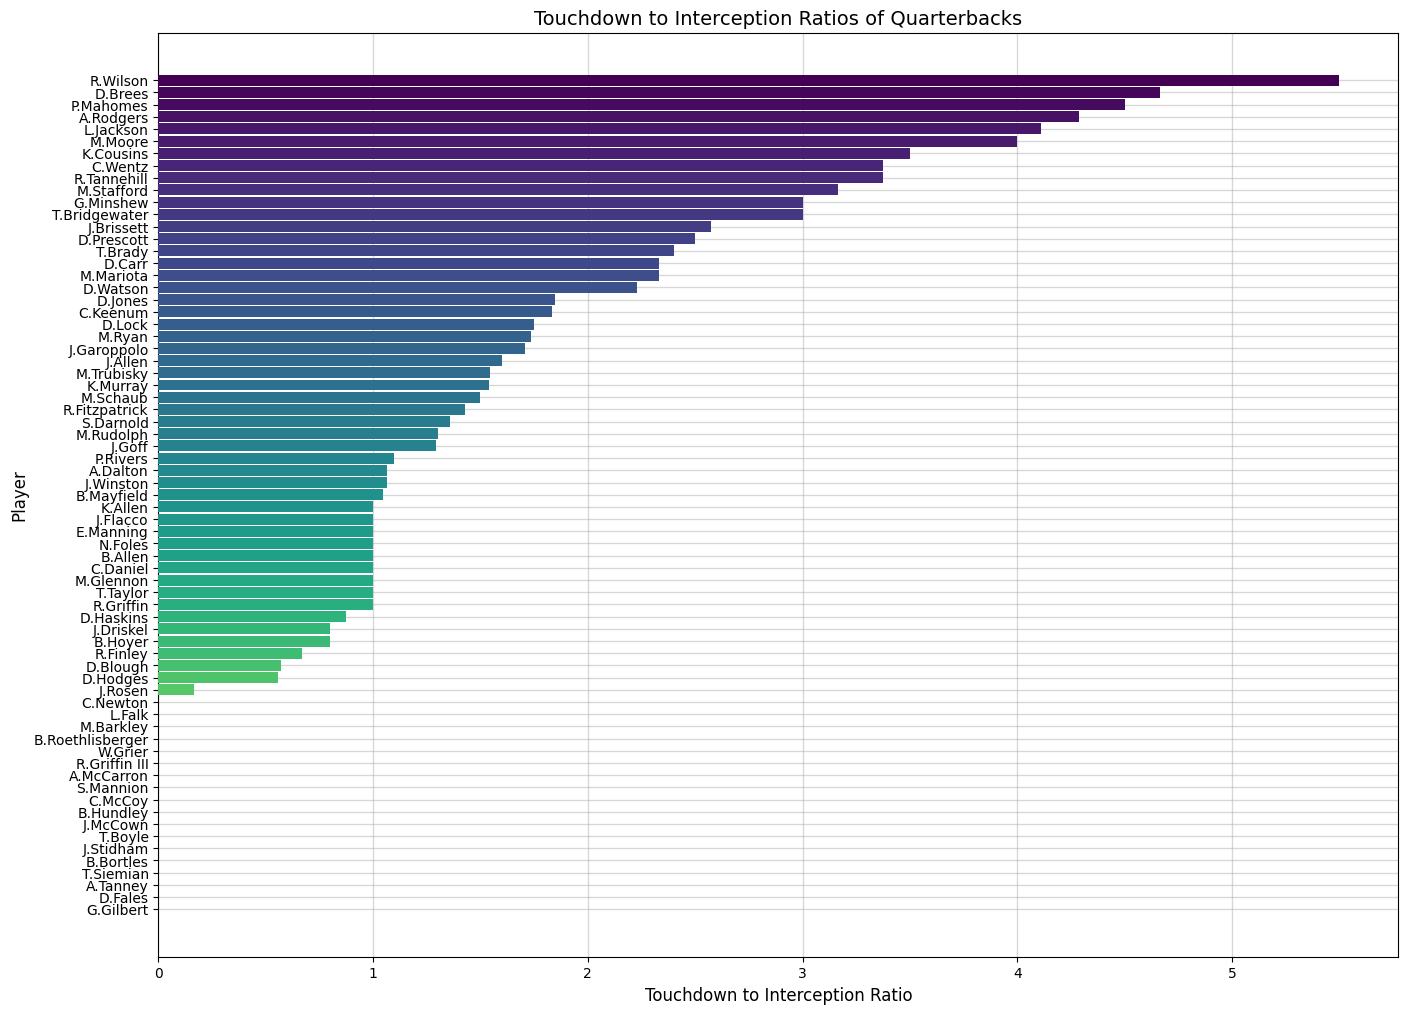

In [416]:
##########################################################################################################################
# Graphed all the td/int ratios for each QB in the 2019 NFL season in decending order
#
##########################################################################################################################

# Load data
stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

# Dictionary to hold player ratios
player_ratios = {}

for player in qb19:
    # Filter the DataFrame for the specific player
    player_stats = stat_file[stat_file['passer_player_name'] == player]

    # Count touchdowns where the touchdown team is the same as the possession team
    td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

    # Count interceptions directly
    int_count = ((player_stats['interception'].sum()) + 1)

    # Calculate the touchdown to interception ratio
    if int_count > 0:
        td_int_ratio = td_count / int_count
    else:
        td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

    # Store the ratio
    player_ratios[player] = td_int_ratio


# Sort the dictionary by values in descending order
sorted_ratios = sorted(player_ratios.items(), key = lambda x: x[1], reverse = True)
players, ratios = zip(*sorted_ratios)

# Setting up the plot with specified size
fig, ax = plt.subplots(figsize = (16, 12))

# Using a color map that changes with the values
colors = plt.cm.viridis(np.linspace(0, 1, len(players)))

#plot type
ax.barh(players, ratios, color = colors, zorder = 3, height = 0.9)

# Customizing plot appearance
ax.set_xlabel('Touchdown to Interception Ratio', fontsize = 12)
ax.set_ylabel('Player', fontsize = 12)
ax.set_title('Touchdown to Interception Ratios of Quarterbacks', fontsize = 14)

# Rotating x-ticks is generally more relevant for vertical bar charts; for horizontal, adjust y-ticks if needed
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Adding grid lines for better readability
ax.grid(True, linestyle = '-', which = 'both', alpha = 0.5, zorder = 2, linewidth = 0.95)

# Inverting the y-axis to have the largest bar at the top if desired
ax.invert_yaxis()

plt.show()


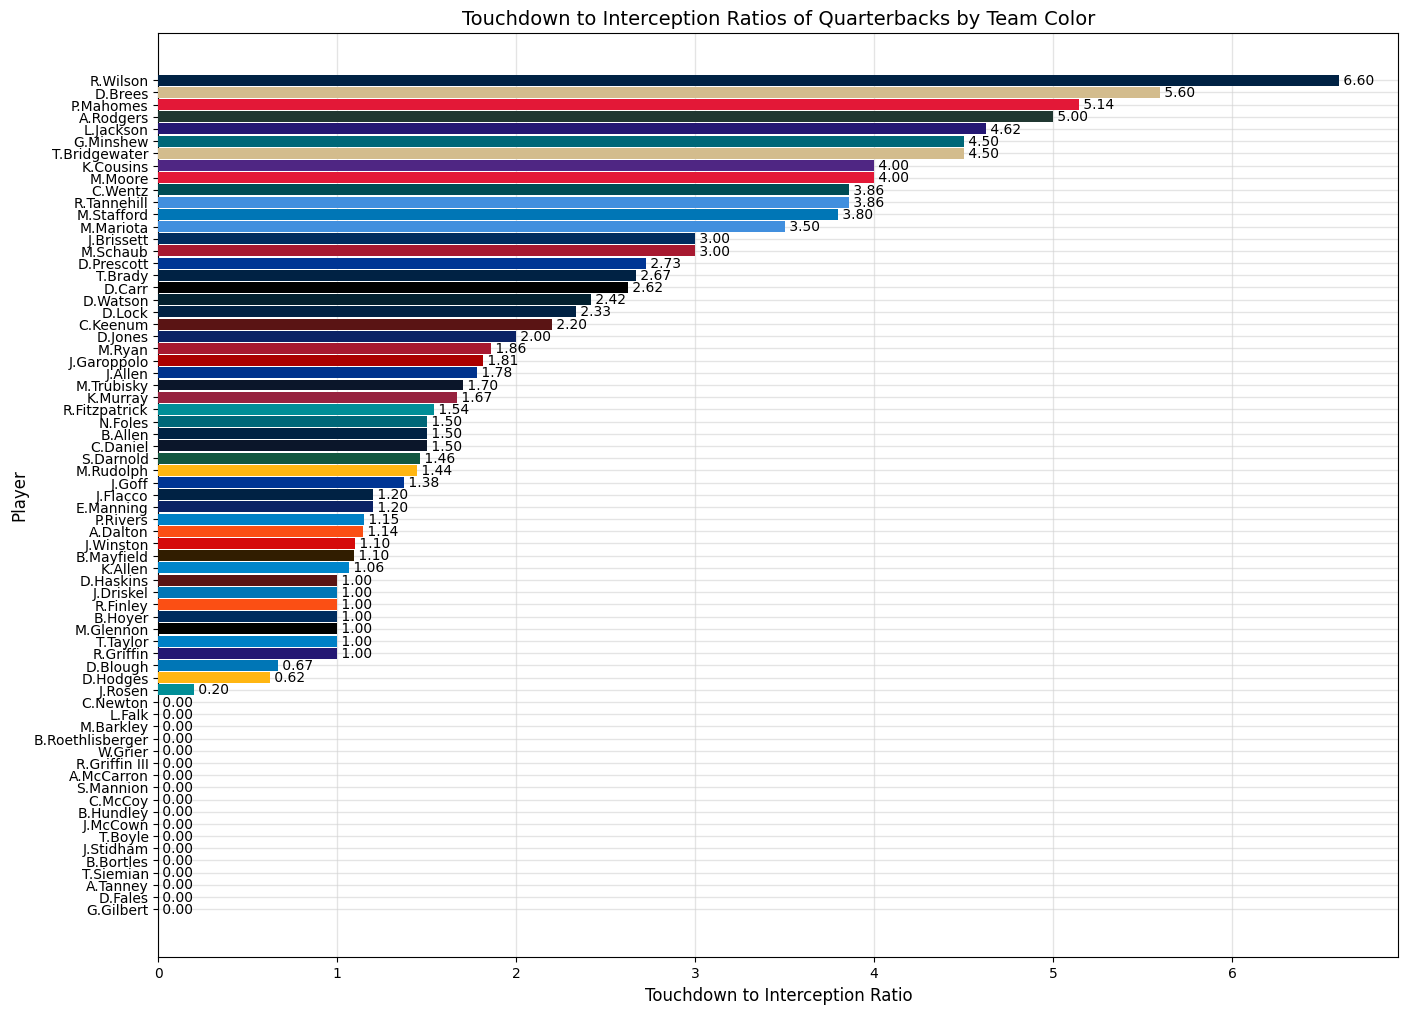

In [417]:
##########################################################################################################################
# Graphed all the td/int ratios for each QB in the 2019 NFL season in decending order.
#  Color coded by team color and value next to bar
##########################################################################################################################

stat_file = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

# Generate a unique color for each team using a colormap
teams = stat_file['posteam'].unique()

team_colors = {
    'ARI': '#97233F',  # Arizona Cardinals Red
    'ATL': '#a71930',  # Atlanta Falcons Red
    'BAL': '#241773',  # Baltimore Ravens Purple
    'BUF': '#00338D',  # Buffalo Bills Blue
    'CAR': '#0085CA',  # Carolina Panthers Blue
    'CHI': '#0B162A',  # Chicago Bears Navy Blue
    'CIN': '#fb4f14',  # Cincinnati Bengals Orange
    'CLE': '#311D00',  # Cleveland Browns Brown
    'DAL': '#003594',  # Dallas Cowboys Blue
    'DEN': '#002244',  # Denver Broncos Navy Blue
    'DET': '#0076b6',  # Detroit Lions Blue
    'GB':  '#203731',  # Green Bay Packers Green
    'HOU': '#03202f',  # Houston Texans Navy Blue
    'IND': '#002C5F',  # Indianapolis Colts Blue
    'JAX': '#006778',  # Jacksonville Jaguars Teal
    'KC':  '#E31837',  # Kansas City Chiefs Red
    'LA':  '#003594',  # Los Angeles Rams Blue
    'LAC': '#0080C6',  # Los Angeles Chargers Blue
    'MIA': '#008E97',  # Miami Dolphins Aqua
    'MIN': '#4F2683',  # Minnesota Vikings Purple
    'NE':  '#002244',  # New England Patriots Navy Blue
    'NO':  '#D3BC8D',  # New Orleans Saints Gold
    'NYG': '#0B2265',  # New York Giants Blue
    'NYJ': '#125740',  # New York Jets Green
    'LV':  '#000000',  # Las Vegas Raiders Black
    'PHI': '#004C54',  # Philadelphia Eagles Green
    'PIT': '#FFB612',  # Pittsburgh Steelers Gold
    'SF':  '#AA0000',  # San Francisco 49ers Red
    'SEA': '#002244',  # Seattle Seahawks Navy Blue
    'TB':  '#D50A0A',  # Tampa Bay Buccaneers Red
    'TEN': '#418FDE',  # Tennessee Titans Navy Oiler Blue (Titan Blue: 4B92DB)
    'WAS': '#5A1414',  # Washington Commanders Burgundy
}


# Dictionary to hold player ratios
player_ratios = {}
player_teams = {}  # Dictionary to keep track of each player's team for coloring

for player in qb19:
    # Filter the DataFrame for the specific player
    player_stats = stat_file[stat_file['passer_player_name'] == player]

    # Get the team of the player (assuming 'posteam' represents the team)
    # If the player has multiple teams, take the first one
    player_team = player_stats['posteam'].iloc[0] if not player_stats.empty else 'UNK'
    player_teams[player] = player_team # Populate the player_teams dictionary

    # Count touchdowns where the touchdown team is the same as the possession team
    td_count = player_stats[(player_stats['touchdown'] == 1) & (player_stats['td_team'] == player_stats['posteam'])]['touchdown'].sum()

    # Count interceptions directly
    int_count = player_stats['interception'].sum()

    # Calculate the touchdown to interception ratio
    if int_count > 0:
        td_int_ratio = td_count / int_count
    #elif td_count > 0 and int_count <= 0:
    #    td_int_ratio = td_count / (int_count + 1)  #Add 1 to avoid division by zero
    else:
        td_int_ratio = td_count / (int_count + 1)  # Define how to handle division by zero

    # Store the ratio
    player_ratios[player] = td_int_ratio

# Sort the dictionary by values in descending order
sorted_ratios = sorted(player_ratios.items(), key = lambda x: x[1], reverse = True)
players, ratios = zip(*sorted_ratios)

# Plot setup
fig, ax = plt.subplots(figsize = (16, 12))

# Create horizontal bar chart using the team colors
for player, ratio in zip(players, ratios):
    team_color = team_colors.get(player_teams[player], 'gray')  # Default to 'gray' if no team is found
    ax.barh(player, ratio, color = team_color, height = 0.9, zorder = 3) #type of graph


    # Add text label to the right of each bar
    ax.text(ratio, player, f' {ratio:.2f}', va = 'center', ha = 'left', fontsize = 10)


ax.set_xlabel('Touchdown to Interception Ratio', fontsize = 12)
ax.set_ylabel('Player', fontsize = 12)
ax.set_title('Touchdown to Interception Ratios of Quarterbacks by Team Color', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
ax.grid(True, linestyle='-', linewidth = 0.95, color = 'lightgray', which = 'both', zorder = 2, alpha = 0.6)

# Invert y-axis to display the highest values at the top
ax.invert_yaxis()

plt.show()

In [418]:
##########################################################################################################################
# got all the distinct items in the 'roof' and 'surface' columns
##########################################################################################################################

temp_stat_file1 = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

print(temp_stat_file1['roof'].unique())
print(temp_stat_file1['surface'].unique())


['dome' 'outdoors' 'closed' 'open']
['sportturf' 'grass' 'fieldturf' 'astroturf']


In [419]:
##########################################################################################################################
# creatd logic to determine how to handel/convert the 'roof'  and  surface' column strings in to numbers
##########################################################################################################################

temp_stat_file2 = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')

temp_stat_file2['roof'] = np.where(
    temp_stat_file2['temp'].isnull(),  # Condition for when temperature is null
    1,  # Value to assign if condition is True (temp is null)
    0   # Value to assign if condition is False (temp is not null)
)

#temp_stat_file2['surface'] = temp_stat_file2['surface'].str.lower().replace({'grass': 0}).fillna(1)
temp_stat_file2['surface'] = temp_stat_file2['surface'].apply(lambda x: 0 if x.lower() == 'grass' else 1)

temp_stat_file2.to_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv', index = False)



In [420]:
##########################################################################################################################
# got updated datatypes of each column before handling 'roof' and 'surface'
##########################################################################################################################

df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player.csv')
print(df.dtypes)

old_game_id                   int64
away_team                    object
posteam                      object
qb_dropback                 float64
qb_kneel                      int64
qb_spike                      int64
qb_scramble                   int64
td_team                      object
total_home_pass_epa         float64
total_away_pass_epa         float64
total_home_pass_wpa         float64
total_away_pass_wpa         float64
first_down_pass             float64
incomplete_pass             float64
interception                float64
fumble_forced               float64
fumble_not_forced           float64
fumble_out_of_bounds        float64
fumble_lost                 float64
qb_hit                      float64
rush_attempt                float64
pass_attempt                float64
sack                        float64
touchdown                   float64
pass_touchdown              float64
rush_touchdown              float64
fumble                      float64
complete_pass               

In [421]:
##########################################################################################################################
# got updated datatypes of each column after handling 'roof' and 'surface'
##########################################################################################################################

df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv')
print(df.dtypes)

old_game_id                   int64
away_team                    object
posteam                      object
qb_dropback                 float64
qb_kneel                      int64
qb_spike                      int64
qb_scramble                   int64
td_team                      object
total_home_pass_epa         float64
total_away_pass_epa         float64
total_home_pass_wpa         float64
total_away_pass_wpa         float64
first_down_pass             float64
incomplete_pass             float64
interception                float64
fumble_forced               float64
fumble_not_forced           float64
fumble_out_of_bounds        float64
fumble_lost                 float64
qb_hit                      float64
rush_attempt                float64
pass_attempt                float64
sack                        float64
touchdown                   float64
pass_touchdown              float64
rush_touchdown              float64
fumble                      float64
complete_pass               

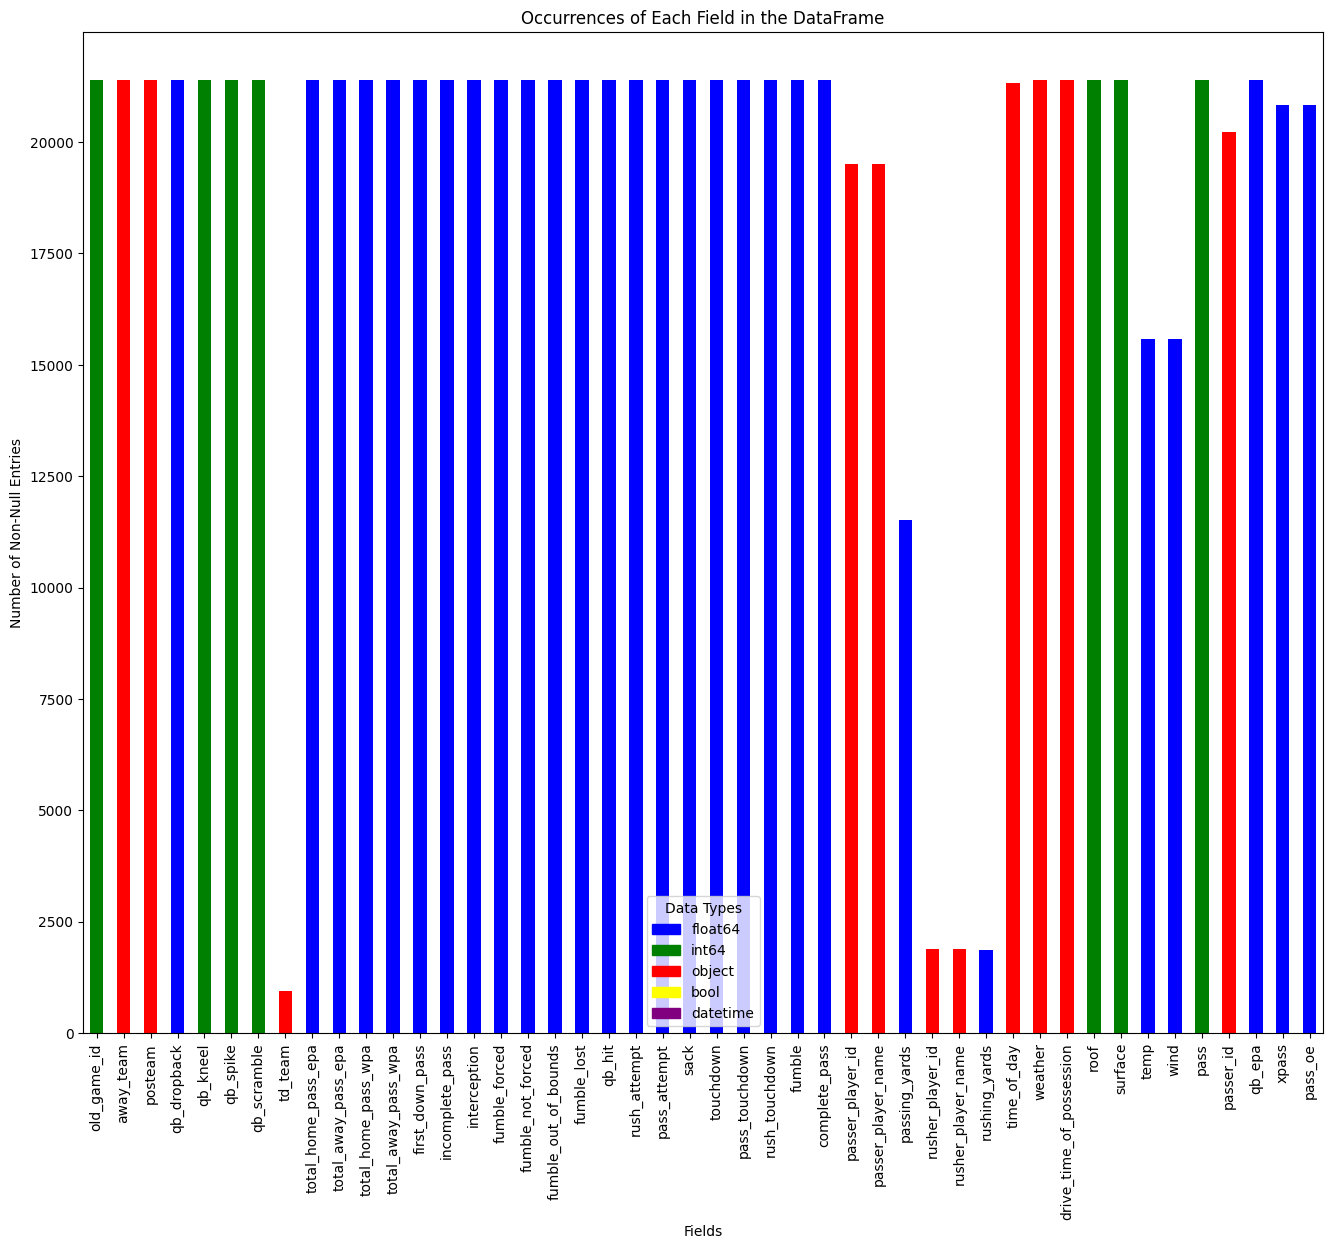

In [422]:
##########################################################################################################################
# graphed the number of items in each column, but this time changed to represent the datatypes of each column and new
#  datatypes of both "roof" and 'surface'
##########################################################################################################################

df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv')


# Assuming 'new_filtered_file' is your DataFrame
field_occurrences = df.notnull().sum()

# Create a dictionary to map data types to colors
data_type_colors = {
    'float64': 'blue',
    'int64': 'green',
    'object': 'red',  # For string types
    'bool': 'yellow',
    'datetime': 'purple',
    # Add more data types and colors as needed
}

# Get the data type of each column, then apply the color mapping
colors = [data_type_colors[str(dtype)] for dtype in df.dtypes]

# Plotting
plt.figure(figsize=(16, 13))  # Set the figure size for better readability
bars = field_occurrences.plot(kind='bar', color=colors)
plt.title('Occurrences of Each Field in the DataFrame')
plt.xlabel('Fields')
plt.ylabel('Number of Non-Null Entries')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap

# Create legend
legend_patches = [mpatches.Patch(color=color, label=dtype) for dtype, color in data_type_colors.items()]
plt.legend(handles=legend_patches, title="Data Types")

plt.show()

In [423]:
##########################################################################################################################
# converted the 'time_of_day' to daytime object type
#
##########################################################################################################################


df = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp.csv')

df['time_of_day'] = pd.to_datetime(df['time_of_day'])


df.to_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', index = False)


In [424]:
##########################################################################################################################
# listed all datatypes again but this time to reflect the new daytime objects
#
##########################################################################################################################

# Load the CSV with the 'parse_dates' parameter specifying which columns to parse as datetime
df_new = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', parse_dates = ['time_of_day'])

# Print the data types of all columns
print(df_new.dtypes)


old_game_id                               int64
away_team                                object
posteam                                  object
qb_dropback                             float64
qb_kneel                                  int64
qb_spike                                  int64
qb_scramble                               int64
td_team                                  object
total_home_pass_epa                     float64
total_away_pass_epa                     float64
total_home_pass_wpa                     float64
total_away_pass_wpa                     float64
first_down_pass                         float64
incomplete_pass                         float64
interception                            float64
fumble_forced                           float64
fumble_not_forced                       float64
fumble_out_of_bounds                    float64
fumble_lost                             float64
qb_hit                                  float64
rush_attempt                            

In [425]:
##########################################################################################################################
# Test of daytime object
#
##########################################################################################################################

df_reloaded = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', parse_dates=['time_of_day'])
print(df_reloaded['time_of_day'].dtype)


datetime64[ns, UTC]


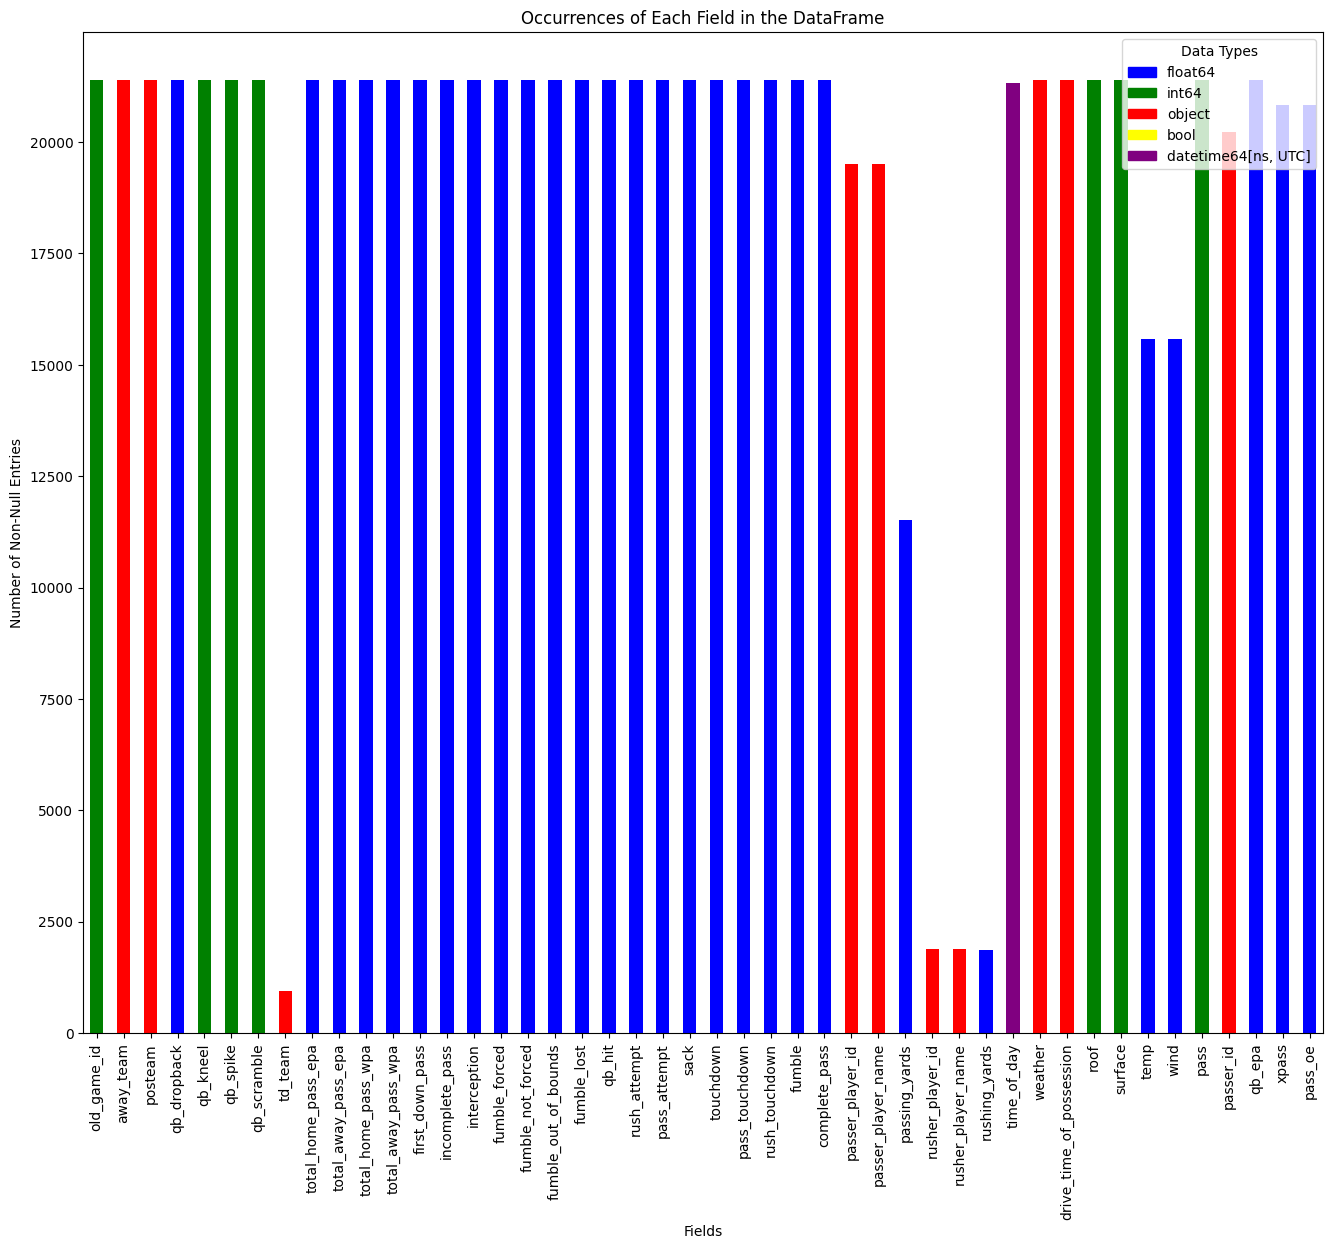

In [426]:
##########################################################################################################################
# Updated column # graph to reflcet the new daytime objects colored in purple now intead of red
#
##########################################################################################################################

df_reloaded = pd.read_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day.csv', parse_dates = ['time_of_day'])


# Assuming 'new_filtered_file' is your DataFrame
field_occurrences = df_reloaded.notnull().sum()

# Create a dictionary to map data types to colors
data_type_colors = {
    'float64': 'blue',
    'int64': 'green',
    'object': 'red',  # For string types
    'bool': 'yellow',
    'datetime64[ns, UTC]': 'purple',
    # Add more data types and colors as needed
}

# Get the data type of each column, then apply the color mapping
colors = [data_type_colors[str(dtype)] for dtype in df_reloaded.dtypes]

# Plotting
plt.figure(figsize=(16, 13))  # Set the figure size for better readability
bars = field_occurrences.plot(kind='bar', color=colors)
plt.title('Occurrences of Each Field in the DataFrame')
plt.xlabel('Fields')
plt.ylabel('Number of Non-Null Entries')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap

# Create legend
legend_patches = [mpatches.Patch(color=color, label=dtype) for dtype, color in data_type_colors.items()]
plt.legend(handles=legend_patches, title="Data Types")

plt.show()

In [427]:
##########################################################################################################################
# makes sure file numbers match graph numbers and vise versa
##########################################################################################################################

#count missing entries in each column
missing_counts = df_reloaded.notnull().sum()

#print the counts of missing entries
print(missing_counts)


old_game_id                 21398
away_team                   21398
posteam                     21398
qb_dropback                 21398
qb_kneel                    21398
qb_spike                    21398
qb_scramble                 21398
td_team                       949
total_home_pass_epa         21398
total_away_pass_epa         21398
total_home_pass_wpa         21398
total_away_pass_wpa         21398
first_down_pass             21398
incomplete_pass             21398
interception                21398
fumble_forced               21398
fumble_not_forced           21398
fumble_out_of_bounds        21398
fumble_lost                 21398
qb_hit                      21398
rush_attempt                21398
pass_attempt                21398
sack                        21398
touchdown                   21398
pass_touchdown              21398
rush_touchdown              21398
fumble                      21398
complete_pass               21398
passer_player_id            19517
passer_player_

In [428]:
print(df_reloaded.dtypes)

old_game_id                               int64
away_team                                object
posteam                                  object
qb_dropback                             float64
qb_kneel                                  int64
qb_spike                                  int64
qb_scramble                               int64
td_team                                  object
total_home_pass_epa                     float64
total_away_pass_epa                     float64
total_home_pass_wpa                     float64
total_away_pass_wpa                     float64
first_down_pass                         float64
incomplete_pass                         float64
interception                            float64
fumble_forced                           float64
fumble_not_forced                       float64
fumble_out_of_bounds                    float64
fumble_lost                             float64
qb_hit                                  float64
rush_attempt                            

In [429]:
##########################################################################################################################
# chnage our player ids to integers by removing the hyphen in each of the individual ids
# then save to new updated file
##########################################################################################################################

change_ids = df_reloaded                                                                                # add in condition for null ids otherwise will not work
change_ids['passer_player_id'] = change_ids['passer_player_id'].apply(lambda x: int(x.replace('-', '')) if pd.notna(x) else x)
change_ids['rusher_player_id'] = change_ids['rusher_player_id'].apply(lambda x: int(x.replace('-', '')) if pd.notna(x) else x)
change_ids['passer_id'] = change_ids['passer_id'].apply(lambda x: int(x.replace('-', '')) if pd.notna(x) else x)

change_ids.to_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day_id_changes.csv', index = False)

In [430]:
td_count_fix = change_ids.copy()
td_count_fix['td_team'] = td_count_fix['td_team'].fillna('')

In [ ]:
# example of how to slice the first 3 indicies of the player_id string and convert them to integers

#temp_stat_file2['player_id_int'] = temp_stat_file2['player_id'].apply(lambda x: int(x[3:]))
#temp_stat_file2.to_csv('nfl_play_by_play_2019_filtered_by_player_roof_temp_time_of_day_player_id_int.csv', index = False)

In [ ]:
#to filter time of day column 14:00 - 01:00 is non primetime and 01:10 to 5:00 is primetime UTC
# CST --> UTC --> Military
# non primetime in cst is 8:00 am - 7:00 pm and primetime in cst is 7:10 pm - 11:00 pm
# primetime = 1 and non primetime = 0

#temp_stat_file2['time_of_day'] = temp_stat_file2['time_of_day'].apply(lambda x: int(x[11:13]))
                                                                                #if primetime then = 1 else = 0 and if null also = 0
#temp_stat_file2['time_of_day'] = temp_stat_file2['time_of_day'].apply(lambda x: 1 if 1 <= x <= 5 else 0)



# Function to determine if the time is primetime
#def determine_primetime(datetime_str):
#    if pd.isna(datetime_str):
#        return 0  # Return 0 for null values
#    hour = int(datetime_str[11:13])  # Extract the hour part from the datetime string '2019-11-03T14:36:22Z'

    # Define primetime as from 01:00 to 05:00 UTC
#    if 1 <= hour <= 5:
#        return 1
#    else:
#        return 0

# Assume temp_stat_file2 is your DataFrame and has been loaded
# Apply the function to the 'time_of_day' column
#temp_stat_file2['time_of_day'] = temp_stat_file2['time_of_day'].apply(determine_primetime)